<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Table of Contents</p>


    
     
   
|No  | Contents |No  | Contents  |
|:---| :---     |:---| :----     |
|0  | [<font color="#006837"> Dataset Info</font>](#0)                               |6.1 |[<font color="#006837"> The Rate Of Canceled Orders </font>](#10) 
|1   | [<font color="#006837"> Importing Libraries & Data</font>](#1)                |6.2 | [<font color="#006837"> Descriptive Statistics  </font>](#11)                |
|2   | [<font color="#006837"> CRM (Customer Relationship Management) </font>](#3)   |6.3 | [<font color="#006837"> Best Customer And Product </font>](#12)       
|3   | [<font color="#006837"> Business Problem</font>](#2)                          |6.4 | [<font color="#006837"> Time Analysis</font>](#13)                 
|4   | [<font color="#006837"> Data Cleaning and Preprocessing</font>](#4) 	         |6.5 | [<font color="#006837"> Country </font>](#15)      
|4.1| [<font color="#006837"> Duplicate Data</font>](#5)                             |6.6 | [<font color="#006837"> Daily Revunue and Quantity</font>](#16)  
|4.2 | [<font color="#006837"> Missing Data</font>](#6)      						 |7 | [<font color="#006837"> Inferences That Can Be Derived From Data At First Sight</font>](#17)  
|4.3 | [<font color="#006837"> Noisy Data</font>](#7) 								 |8 | [<font color="#006837"> RFM Analysis</font>](#18)  
|4.4 | [<font color="#006837"> Outliers Data</font>](#14)     						 |9 | [<font color="#006837">  K Means </font>](#19)  
|5 | [<font color="#006837"> Feature Engineering</font>](#8)   						 |10 | [<font color="#006837"> Cohort Analysis </font>](#20)  	
|6 | [<font color="#006837"> Exploratory Data Analysis</font>](#9)       
       

<a id="0"></a>
# <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Dataset Info</p>



Using the [Online Retail dataset](https://archive.ics.uci.edu/ml/datasets/Online+Retail) from the UCI Machine Learning Repository for exploratory data analysis, ***Customer Segmentation***, ***RFM Analysis***, ***K-Means Clustering*** and ***Cohort Analysis***.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Feature Information:

**InvoiceNo**: Invoice number. *Nominal*, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
<br>
**StockCode**: Product (item) code. *Nominal*, a 5-digit integral number uniquely assigned to each distinct product.
<br>
**Description**: Product (item) name. *Nominal*. 
<br>
**Quantity**: The quantities of each product (item) per transaction. *Numeric*.
<br>
**InvoiceDate**: Invoice Date and time. *Numeric*, the day and time when each transaction was generated.
<br>
**UnitPrice**: Unit price. *Numeric*, Product price per unit in sterling.
<br>
**CustomerID**: Customer number. *Nominal*, a 5-digit integral number uniquely assigned to each customer.
<br>
**Country**: Country name. *Nominal*, the name of the country where each customer resides.

<a id="1"></a>
# <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Importing Libraries & Data</p>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime
import re
import datetime as dt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

plt.rcParams["figure.figsize"] = (12,6)
sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [2]:
retail_data = pd.read_csv('Online_Retail.csv')
df = retail_data.copy()
df.head(8)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55    17850.00  United Kingdom  
1  2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
2  2010-12-01 08:26:00       2.75    17850.00  United Kingdom  
3  2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
4  2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
5  2010-12-01 08:26:00       7.65    17850.00  United Kingdom  
6  2010-12-01 08:26:00       4.25    17850.00  United Kingdom  
7  2010-12-01 08:28:00       1.85    17850.00  United Kingdom

<a id="3"></a>
# <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">CRM (Customer Relationship Management) </p>

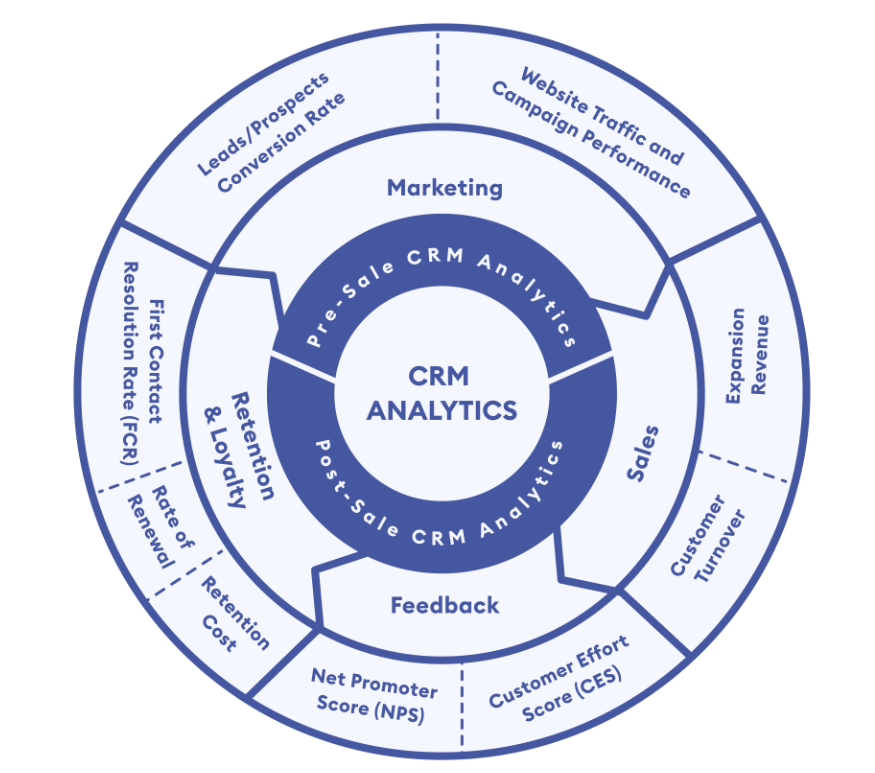

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> <font color="DARKCYAN"><b>CRM (Customer Relationship Management) </b></font> analytics is the practice of examining customer data to discover trends that can be applied to enhance customer relationships and eventually spur corporate expansion. CRM analytics entails gathering and studying information on client interactions and behavior across a variety of touchpoints, including social media, marketing, customer service, and sales.
    
<li>CRM analytics seeks to gain a deeper understanding of the needs, interests, and behaviors of consumers in order to maximize customer engagement and loyalty. Businesses can forecast future consumer actions and preferences by studying customer data. They can also create customized marketing and sales strategies that appeal to their target market.
    
</ul>
</div>


## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Benefits of CRM Analysis </p>


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> <font color="DARKCYAN"><b>1.Improved Customer Understanding</b></font> <br>
    Using CRM analysis, organizations can better understand their clients based on their behavior, interactions, preferences, and feedback. As a result, companies can create a more accurate image of their clients and tailor marketing and sales strategies accordingly.
    
<li>  <font color="DARKCYAN"><b>2.Increased Customer Retention</b></font>  <br>
    Analysis of customer data allows businesses to identify at-risk customers and take proactive steps to retain them. It can include targeted marketing campaigns, personalized offers, or proactive outreach to address any concerns.

<li> <font color="DARKCYAN"><b>3.Improved Upselling and Cross-Selling</b></font> <br>
 CRM analysis can assist firms in finding chances to cross-sell or upsell goods and services to current clients. Businesses can create tailored offers and recommendations that are more likely to be effective by studying client behavior and preferences   
    
<li>  <font color="DARKCYAN"><b> 4.Improved Sales Forecasting </b></font>  <br>
 CRM analysis can help businesses to better forecast sales by analyzing historical data and identifying trends and patterns.  This can assist companies in forecasting revenues more accurately, which helps guide strategic planning and resource allocation.    
    
<li>  <font color="DARKCYAN"><b> 5.Enhanced Customer Experience </b></font>  <br>
Businesses can improve the customer experience by employing CRM analysis to personalize customer communications and interactions. Increased consumer happiness, loyalty, and advocacy may result from this.

<li><font color="DARKCYAN"><b> Overall, </b></font> CRM analysis is a potent tool for companies wanting to strengthen client relationships and spur expansion. Businesses may create more targeted and efficient marketing and sales strategies, raise customer retention rates, and improve the overall customer experience by utilizing customer data and insights.
    
</ul>
</div>

<a id="2"></a>
# <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Business Problem</p>

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> Data analysts work to understand organizations' data and make it available for business decisions.
<li> Understanding consumer preferences and behavior is our aim. 
<li> By acting on customer data, we can determine how to communicate with customers, develop individualized marketing campaigns, and boost customer satisfaction.
    
</ul>
</div>

<a id="4"></a>
# <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Data Cleaning and Preprocessing</p>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.shape

(541909, 8)

In [5]:
# Checking the random 20 rows of df
df.sample(20)

InvoiceNo StockCode                          Description  Quantity  \
46449     540353     20728                  LUNCH BAG CARS BLUE         2   
496778    578347     22540           MINI JIGSAW CIRCUS PARADE          1   
410265    572098     23486             ANTIQUE HEART SHELF UNIT         1   
467282    576339     23132     SMALL IVORY HEART WALL ORGANISER         1   
98156     544672     21238                    RED RETROSPOT CUP        24   
147124    549055     21899              KEY FOB , GARAGE DESIGN        24   
224221    556510     23079             TOADSTOOL BEDSIDE LIGHT          4   
227327    556829     21259          VICTORIAN SEWING BOX SMALL          4   
51907     540681     21520         BOOZE & WOMEN GREETING CARD          2   
526578    580672     22400    MAGNETS PACK OF 4 HOME SWEET HOME         3   
383823    570088     20973        12 PENCIL SMALL TUBE WOODLAND         1   
532431    580983     22899         CHILDREN'S APRON DOLLY GIRL          1   
365447    568708     23391          I LOVE LONDON MINI BACKPACK         4   
384793    570179     22736          RIBBON REEL MAKING SNOWMEN         10   
371214    569216     82486  3 DRAWER ANTIQUE WHITE WOOD CABINET         2   
309973    564150    84970L     SINGLE HEART ZINC T-LIGHT HOLDER        12   
362275   C568416     22193                 RED DINER WALL CLOCK        -1   
106132    545312     22055   MINI CAKE STAND  HANGING STRAWBERY         3   
47458     540415     21498                  RED RETROSPOT WRAP         25   
213170    555524     23169             CLASSIC GLASS COOKIE JAR         1   

                InvoiceDate  UnitPrice  CustomerID          Country  
46449   2011-01-06 14:53:00       1.65    13764.00   United Kingdom  
496778  2011-11-24 09:26:00       0.83         NaN   United Kingdom  
410265  2011-10-20 15:38:00      16.65    15117.00   United Kingdom  
467282  2011-11-14 15:27:00      12.46    14096.00   United Kingdom  
98156   2011-02-22 15:45:00       0.85    14646.00      Netherlands  
147124  2011-04-06 10:33:00       0.65    13515.00   United Kingdom  
224221  2011-06-13 10:36:00       8.95    14911.00             EIRE  
227327  2011-06-15 10:51:00       5.95    12809.00         Portugal  
51907   2011-01-10 16:25:00       0.43         NaN   United Kingdom  
526578  2011-12-05 14:29:00       0.39    17920.00   United Kingdom  
383823  2011-10-07 11:32:00       0.65    16764.00   United Kingdom  
532431  2011-12-06 16:26:00       4.13         NaN   United Kingdom  
365447  2011-09-28 15:41:00       4.15    12393.00        Australia  
384793  2011-10-07 14:27:00       1.65    17509.00   United Kingdom  
371214  2011-10-02 12:41:00       8.95    15555.00   United Kingdom  
309973  2011-08-23 12:30:00       0.95    14936.00  Channel Islands  
362275  2011-09-27 11:08:00       7.65    14866.00   United Kingdom  
106132  2011-03-01 13:51:00       1.65    15456.00   United Kingdom  
47458   2011-01-07 10:47:00       0.42    16889.00   United Kingdom  
213170  2011-06-05 11:37:00       4.15    16923.00   United Kingdom

<a id="5"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Duplicated Data</p>

In [6]:
def Duplicated_Data(df):
    """
    Returns a cleaned pandas DataFrame with no duplicate rows.

    Parameters:
    df (pandas DataFrame): The input DataFrame with potentially duplicated rows.

    Returns:
    pandas DataFrame: A cleaned DataFrame with all duplicate rows removed.

    Example:
    clean_df = Duplicated_Data(df)
    """
    
    # Find the duplicate rows
    Duplicated_Data = df.duplicated()
        
    # Print the number of duplicate rows found
    print("Duplicated data count: ", Duplicated_Data.sum())
    
    # Remove duplicate rows from the dataset
    clean_data = df.drop_duplicates()
      
    return clean_data


In [7]:
df = Duplicated_Data(df)

Duplicated data count:  5268


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> We removed 5268 duplicate data from the dataset.
</ul>
</div>

<a id="6"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Missing Data</p>

In [8]:
def show_missing(df):
    """
    	Return a Pandas dataframe describing the contents of a source dataframe including missing values.
    """
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    pc_missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())
        pc_missing.append(round((df[item].isna().sum() / len(df[item])) * 100, 2))

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing, 
        'pc_missing': pc_missing
    })    
        
    return output.sort_values("missing",ascending=False).reset_index(drop=True)

In [9]:
show_missing(df)

variable    dtype   count  unique  missing  pc_missing
0   CustomerID  float64  536641    4373   135037       25.16
1  Description   object  536641    4224     1454        0.27
2    InvoiceNo   object  536641   25900        0        0.00
3    StockCode   object  536641    4070        0        0.00
4     Quantity    int64  536641     722        0        0.00
5  InvoiceDate   object  536641   23260        0        0.00
6    UnitPrice  float64  536641    1630        0        0.00
7      Country   object  536641      38        0        0.00

In [10]:
df.dropna(subset=["CustomerID"], inplace=True)

In [11]:
show_missing(df)

variable    dtype   count  unique  missing  pc_missing
0    InvoiceNo   object  401604   22190        0        0.00
1    StockCode   object  401604    3684        0        0.00
2  Description   object  401604    3896        0        0.00
3     Quantity    int64  401604     436        0        0.00
4  InvoiceDate   object  401604   20460        0        0.00
5    UnitPrice  float64  401604     620        0        0.00
6   CustomerID  float64  401604    4372        0        0.00
7      Country   object  401604      37        0        0.00

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> We removed the data without a customer number from the dataset as we will perform CRM analysis.
<li> A total of 135037 data were discarded.       
</ul>
</div>

<a id="7"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800"> Noisy Data</p>

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> <font color="DARKCYAN"><b>Noisy data is meaningless data.</b></font> 
    The phrase has frequently been used interchangeably with faulty data. However, it now refers to any data, including unstructured data, that cannot be correctly understood and interpreted by machines. Noisy data is any data that has been received, stored, or altered in a way that prevents the program that originally created it from reading or using it.
<li> Because <font color="DARKCYAN"><b>noisy data</b></font> can hide the true signal in the data, it can be challenging to find patterns and relationships within a dataset.      
</ul>
</div>


In [12]:
df.sample(40)

InvoiceNo StockCode                         Description  Quantity  \
387709    570374     22699    ROSES REGENCY TEACUP AND SAUCER          1   
117013    546321     22789   T-LIGHT HOLDER SWEETHEART HANGING         8   
393832    570855     21733    RED HANGING HEART T-LIGHT HOLDER         6   
80548     543040     21481          FAWN BLUE HOT WATER BOTTLE         1   
34664     539417     22164         STRING OF STARS CARD HOLDER         6   
4184      536752    84406B      CREAM CUPID HEARTS COAT HANGER         6   
154074    549844     22652                   TRAVEL SEWING KIT         3   
20127     538010     71053                 WHITE METAL LANTERN         4   
201129    554270     82583                HOT BATHS METAL SIGN         1   
7983      537077     22469               HEART OF WICKER SMALL         4   
200756    554157     22554    PLASTERS IN TIN WOODLAND ANIMALS         1   
149274    549286     21915              RED  HARMONICA IN BOX          3   
151255    549548    84510C          SET OF 4 POLKADOT COASTERS         3   
433752    573993     22325              MOBILE VINTAGE HEARTS          3   
208557    555124    85049G              CHOCOLATE BOX RIBBONS          1   
421340    572935     22730          ALARM CLOCK BAKELIKE IVORY         4   
410804    572132     22161    HEART DECORATION RUSTIC HANGING         24   
417505    572662     23370      SET 36 COLOURING PENCILS DOILY         5   
425999    573341     23349         ROLL WRAP VINTAGE CHRISTMAS        12   
163920    550630     20803        SMALL PINK GLASS SUNDAE DISH        72   
248518    558860     21642           ASSORTED TUTTI FRUTTI PEN        24   
106167    545314     21217       RED RETROSPOT ROUND CAKE TINS         5   
373541    569332     23202              JUMBO BAG VINTAGE LEAF         3   
428040    573411     22726          ALARM CLOCK BAKELIKE GREEN         4   
420834    572911     22579  WOODEN TREE CHRISTMAS SCANDINAVIAN        20   
397270    571158     21775    DECORATIVE FLORE BATHROOM BOTTLE         6   
157322    550201     21906             PHARMACIE FIRST AID TIN         6   
271832    560723     23065          LARGE DECO JEWELLERY STAND         1   
321672    565181     21790                  VINTAGE SNAP CARDS        72   
393525    570829     23301   GARDENERS KNEELING PAD KEEP CALM         12   
335001    566274     23066          SMALL DECO JEWELLERY STAND         1   
114734    546079     23176              ABC TREASURE BOOK BOX          1   
61683     541480    16168M        FUNKY MONKEY GIFT BAG MEDIUM        24   
434669    574055     21259         VICTORIAN SEWING BOX SMALL          2   
493791    578250     23158         SET OF 5 LUCKY CAT MAGNETS          1   
335048    566275     23399       HOME SWEET HOME HANGING HEART         6   
448062    575017     22578  WOODEN STAR CHRISTMAS SCANDINAVIAN         8   
311147    564226     22546                  MINI JIGSAW PURDEY        24   
205870    554840     22273                FELTCRAFT DOLL MOLLY        24   
446311    574892     22755     SMALL PURPLE BABUSHKA NOTEBOOK          6   

                InvoiceDate  UnitPrice  CustomerID         Country  
387709  2011-10-10 12:34:00       2.95    14719.00  United Kingdom  
117013  2011-03-11 09:39:00       1.95    16475.00  United Kingdom  
393832  2011-10-12 14:56:00       2.95    17314.00  United Kingdom  
80548   2011-02-02 17:06:00       2.95    17337.00  United Kingdom  
34664   2010-12-17 13:57:00       2.95    17007.00  United Kingdom  
4184    2010-12-02 14:06:00       2.75    17850.00  United Kingdom  
154074  2011-04-12 14:17:00       1.65    12854.00  United Kingdom  
20127   2010-12-09 12:20:00       3.75    17526.00  United Kingdom  
201129  2011-05-23 13:05:00       2.10    15046.00  United Kingdom  
7983    2010-12-05 11:59:00       1.65    17062.00  United Kingdom  
200756  2011-05-23 11:33:00       1.65    18283.00  United Kingdom  
149274  2011-04-07 18:03:00       1.25    17928.00  United Kin

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul> 
<li> InvoiceNo  If this code starts with letter 'c', it indicates a cancellation.
<li> Some Quantity and UnitPrice negatif or 0  
<li> StockCode  a 5-digit integral number uniquely assigned to each distinct product but there are alphabetical characters in some stock codes
<li> CustomerID float need be to int 
<li> I didn't understand some of the Description.They appear pointless. It's important to comprehend why they happened.	  
<li> InvoiceDate object need to be datetime    
</ul>
</div>


In [13]:
df["Cancellation"] = df['InvoiceNo'].astype(str).str.contains('^[C]', regex=True)*1
df[df["Cancellation"]==1]

InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

                InvoiceDate  UnitPrice  CustomerID         Country  \
141     2010-12-01 09:41:00      27.50    14527.00  United Kingdom   
154     2010-12-01 09:49:00       4.65    15311.00  United Kingdom   
235     2010-12-01 10:24:00       1.65    17548.00  United Kingdom   
236     2010-12-01 10:24:00       0.29    17548.00  United Kingdom   
237     2010-12-01 10:24:00       0.29    17548.00  United Kingdom   
...                     ...        ...         ...             ...   
540449  2011-12-09 09:57:00       0.83    14397.00  United Kingdom   
541541  2011-12-09 10:28:00     224.69    15498.00  United Kingdom   
541715  2011-12-09 11:57:00      10.95    15311.00  United Kingdom   
541716  2011-12-09 11:58:00       1.25    17315.00  United Kingdom   
541717  2011-12-09 11:58:00       1.25    17315.00  United Kingdom   

        Cancellation  
141                1  
154                1  
235                1  
236                1  
237                1  
...              ...  
540449             1  
541541             1  
541715             1  
541716             1  
541717             1  

[8872 rows x 9 columns]

In [14]:
# We don't get one of the previous invoicenos, when we delete C.
df["InvoiceNo"].isin(df.loc[df["Cancellation"] == 1]["InvoiceNo"].str.replace("C","").values).sum()

0

In [15]:
df[df["InvoiceNo"].isin(df.loc[df["Cancellation"] == 1]["InvoiceNo"].str.replace("C","").values)]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, Cancellation]
Index: []

In [16]:
df.drop(index=df.loc[df.Cancellation == 1].index)

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  \
0       2010-12-01 08:26:00       2.55    17850.00  United Kingdom   
1       2010-12-01 08:26:00       3.39    17850.00  United Kingdom   
2       2010-12-01 08:26:00       2.75    17850.00  United Kingdom   
3       2010-12-01 08:26:00       3.39    17850.00  United Kingdom   
4       2010-12-01 08:26:00       3.39    17850.00  United Kingdom   
...                     ...        ...         ...             ...   
541904  2011-12-09 12:50:00       0.85    12680.00          France   
541905  2011-12-09 12:50:00       2.10    12680.00          France   
541906  2011-12-09 12:50:00       4.15    12680.00          France   
541907  2011-12-09 12:50:00       4.15    12680.00          France   
541908  2011-12-09 12:50:00       4.95    12680.00          France   

        Cancellation  
0                  0  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
541904             0  
541905             0  
541906             0  
541907             0  
541908             0  

[392732 rows x 9 columns]

In [17]:
df.drop(index= df.loc[df.Cancellation == 1].index, inplace=True)

In [18]:
# We  dont need Cancellation 
df = df.drop(columns=["Cancellation"])

In [19]:
(df.Quantity <= 0).sum()

0

In [20]:
(df.UnitPrice <= 0).sum()

40

In [21]:
# unit price has  0 so we drop that data
df[df.UnitPrice <= 0]

InvoiceNo StockCode                          Description  Quantity  \
9302      537197     22841         ROUND CAKE TIN VINTAGE GREEN         1   
33576     539263     22580         ADVENT CALENDAR GINGHAM SACK         4   
40089     539722     22423             REGENCY CAKESTAND 3 TIER        10   
47068     540372     22090              PAPER BUNTING RETROSPOT        24   
47070     540372     22553               PLASTERS IN TIN SKULLS        24   
56674     541109     22168        ORGANISER WOOD ANTIQUE WHITE          1   
86789     543599    84535B         FAIRY CAKES NOTEBOOK A6 SIZE        16   
130188    547417     22062  CERAMIC BOWL WITH LOVE HEART DESIGN        36   
139453    548318     22055   MINI CAKE STAND  HANGING STRAWBERY         5   
145208    548871     22162          HEART GARLAND RUSTIC PADDED         2   
157042    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE         1   
187613    553000     47566                        PARTY BUNTING         4   
198383    554037     22619            SET OF 6 SOLDIER SKITTLES        80   
279324    561284     22167           OVAL WALL MIRROR DIAMANTE          1   
282912    561669     22960             JAM MAKING SET WITH JARS        11   
285657    561916         M                               Manual         1   
298054    562973     23157           SET OF 6 NATIVITY MAGNETS        240   
314745    564651     23270     SET OF 2 CERAMIC PAINTED HEARTS         96   
314746    564651     23268  SET OF 2 CERAMIC CHRISTMAS REINDEER       192   
314747    564651     22955             36 FOIL STAR CAKE CASES        144   
314748    564651     21786                   POLKADOT RAIN HAT        144   
358655    568158      PADS           PADS TO MATCH ALL CUSHIONS         1   
361825    568384         M                               Manual         1   
379913    569716     22778                   GLASS CLOCHE SMALL         2   
395529    571035         M                               Manual         1   
420404    572893     21208          PASTEL COLOUR HONEYCOMB FAN         5   
436428    574138     23234        BISCUIT TIN VINTAGE CHRISTMAS       216   
436597    574175     22065       CHRISTMAS PUDDING TRINKET POT         12   
436961    574252         M                               Manual         1   
439361    574469     22385            JUMBO BAG SPACEBOY DESIGN        12   
446125    574879     22625                   RED KITCHEN SCALES         2   
446793    574920     22899         CHILDREN'S APRON DOLLY GIRL          1   
446794    574920     23480       MINI LIGHTS WOODLAND MUSHROOMS         1   
454463    575579     22437        SET OF 9 BLACK SKULL BALLOONS        20   
454464    575579     22089        PAPER BUNTING VINTAGE PAISLEY        24   
479079    577129     22464          HANGING METAL HEART LANTERN         4   
479546    577168         M                               Manual         1   
480649    577314     23407       SET OF 2 TRAYS HOME SWEET HOME         2   
485985    577696         M                               Manual         1   
502122    578841     84826       ASSTD DESIGN 3D PAPER STICKERS     12540   

                InvoiceDate  UnitPrice  CustomerID         Country  
9302    2010-12-05 14:02:00       0.00    12647.00         Germany  
33576   2010-12-16 14:36:00       0.00    16560.00  United Kingdom  
40089   2010-12-21 13:45:00       0.00    14911.00            EIRE  
47068   2011-01-06 16:41:00       0.00    13081.00  United Kingdom  
47070   2011-01-06 16:41:00       0.00    13081.00  United Kingdom  
56674   2011-01-13 15:10:00       0.00    15107.00  United Kingdom  
86789   2011-02-10 13:08:00       0.00    17560.00  United Kingdom  
130188  2011-03-23 10:25:00       0.00    13239.00  United Kingdom  
139453  2011-03-30 12:45:00       0.00    13113.00  United Kingdom  
145208  2011-04-04 14:42:00       0.00    14410.00  United Kingdom  
157042  2011-04-14 18:57:00       0.00    12457.00     Switzerland  
187613  2011-05-12 15

In [22]:
df[df.UnitPrice == 0].index

Int64Index([  9302,  33576,  40089,  47068,  47070,  56674,  86789, 130188,
            139453, 145208, 157042, 187613, 198383, 279324, 282912, 285657,
            298054, 314745, 314746, 314747, 314748, 358655, 361825, 379913,
            395529, 420404, 436428, 436597, 436961, 439361, 446125, 446793,
            446794, 454463, 454464, 479079, 479546, 480649, 485985, 502122],
           dtype='int64')

In [23]:
index_drop = df[df.UnitPrice == 0].index
df.drop(index_drop,inplace=True)

In [24]:
(df.UnitPrice <= 0).sum()

0

In [27]:
df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].value_counts()

POST            1099
M                279
C2               133
DOT               16
BANK CHARGES      12
PADS               3
Name: StockCode, dtype: int64

In [28]:
df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].value_counts().sum()

1542

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul> 
<li> We see that there are several types of peculiar transactions
<li> POST -> POSTAGE 
<li> D    -> Discount       
<li> C2   -> CARRIAGE   
<li> M    -> Manual   
<li> DOT  -> DOTCOM POSTAGE  
<li> PADS -> PADS TO MATCH ALL CUSHIONS     
<li> BANK CHARGES   -> Bank Charges  
<li> <font color="Red"><b> As a data analyst, it is crucial for us to understand the data's origins, creation process, and backstory in order to fully comprehend the data. </b></font>
<li> <font color="Red"><b>Data is more than simply words or numbers.</b></font> 
<li> <font color="Red"><b> How can we tell a story without understanding the story of the data?   </b></font> 
<li> Since I don't know the background of the data, I will remove it from the dataset.
</ul>
</div>

 

In [29]:
index_drop = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)].index
index_drop

Int64Index([    45,    386,   1123,   1423,   2239,   2250,   4406,   5073,
              5258,   5325,
            ...
            535063, 536968, 537459, 537462, 538321, 541198, 541216, 541730,
            541767, 541768],
           dtype='int64', length=1542)

In [30]:
df.drop(index_drop,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391150 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    391150 non-null  object        
 1   StockCode    391150 non-null  object        
 2   Description  391150 non-null  object        
 3   Quantity     391150 non-null  int64         
 4   InvoiceDate  391150 non-null  datetime64[ns]
 5   UnitPrice    391150 non-null  float64       
 6   CustomerID   391150 non-null  int32         
 7   Country      391150 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.4+ MB



<a id="14"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800"> Outliers Data</p>

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> <font color="DARKCYAN"><b>Outlier is a data point that is significantly different from other data points in the same dataset.</b></font> 
<li> Since outliers can distort statistical variables like mean, standard deviation, and correlation coefficient, they can significantly affect the outcomes of data analysis.  
<li> For example, if the mean of a dataset is calculated without removing the outliers, it may not accurately represent the central tendency of the data.
<li> As a result, in data analysis, it is frequently required to recognize and effectively handle outliers    
<li> This can be done by using statistical methods such as the Z-score test, interquartile range (IQR), or boxplots. 
<li> The influence of an outlier on the entire analysis should be determined individually if the outlier is a genuine data point rather than being eliminated. The outlier may need to be removed from the dataset if it turns out to be an error.
  
<li>  In conclusion, outliers should be carefully investigated before determining whether to keep them in the dataset or discard them. Based on the reason for the outlier, how it affected the analysis, and the analysis's objectives, a judgment should be made. 
</ul>
</div>


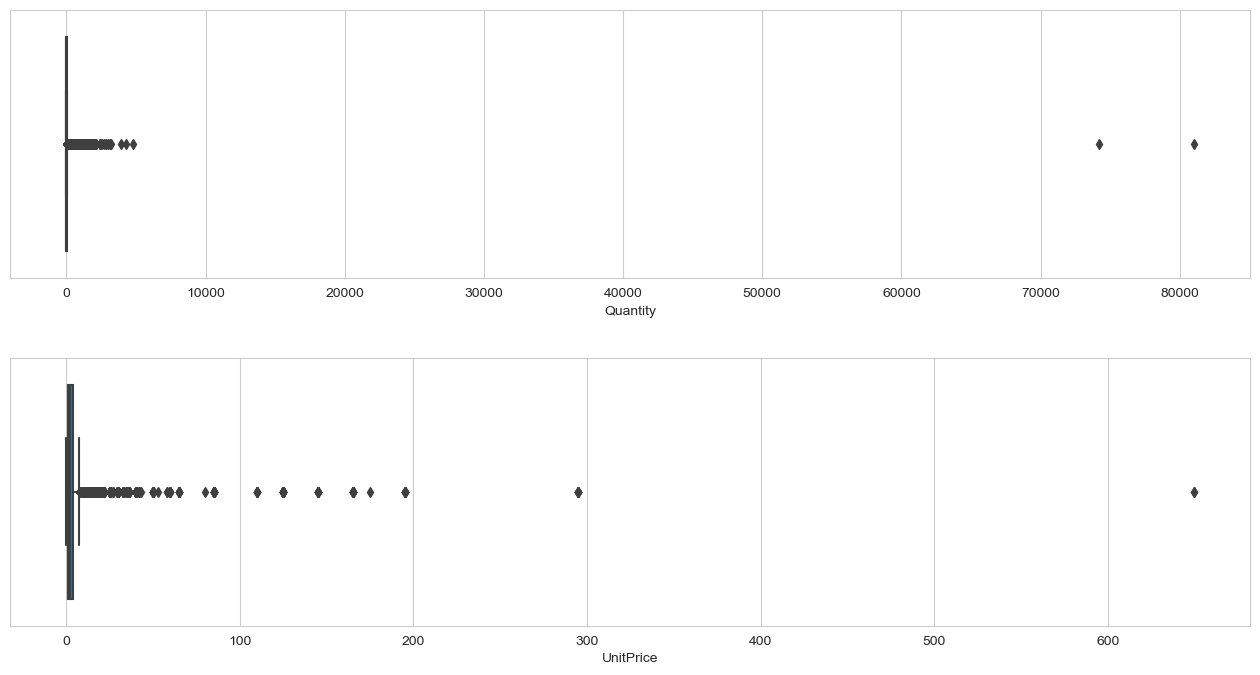

In [32]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
sns.boxplot(x=df["Quantity"])

plt.subplot(2,1,2)
sns.boxplot(x=df["UnitPrice"])

plt.subplots_adjust(hspace=0.3);

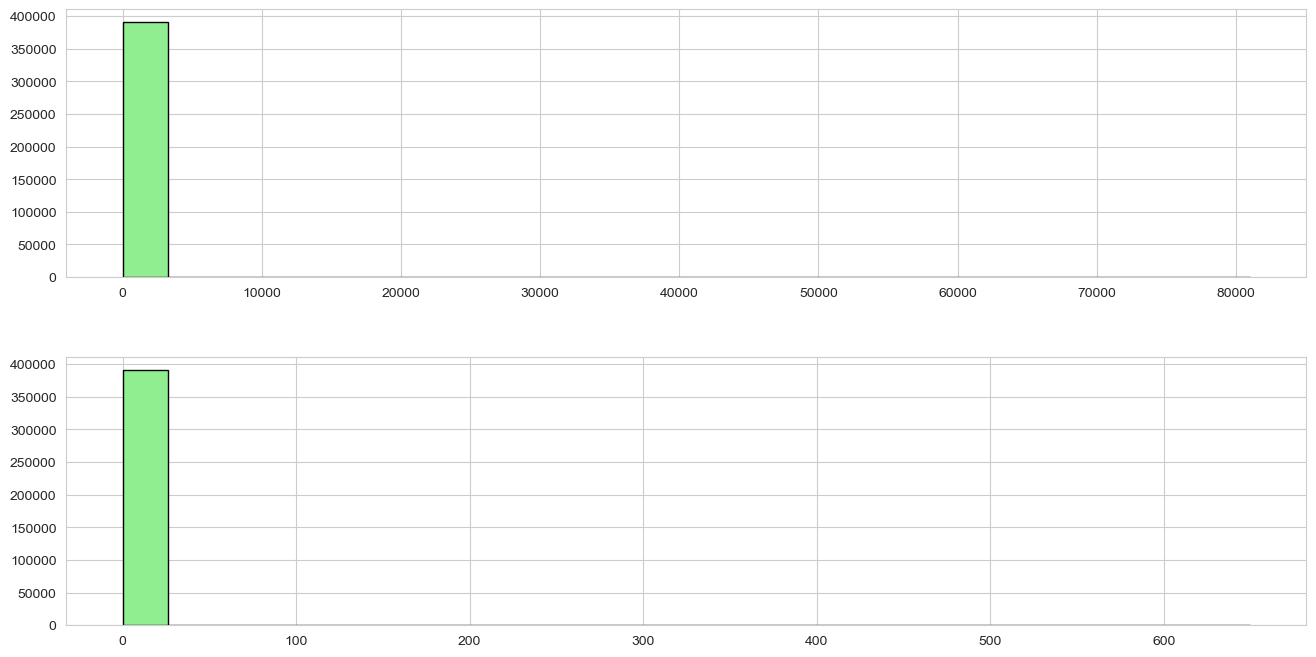

In [33]:
plt.figure(figsize=(16,8))

plt.subplot(2,1,1)
plt.hist(df["Quantity"], color='lightgreen', ec='black', bins=25);

plt.subplot(2,1,2)
plt.hist(df["UnitPrice"], color='lightgreen', ec='black', bins=25);

plt.subplots_adjust(hspace=0.3);

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>

<li> It is obvious that handling outliers in quantity and unit price is necessary.
  
    
</ul>
</div>

In [149]:
def remove_outliers(df, column_name, factor=1.5):
    """
    Removes outliers from a specified column in a pandas DataFrame using the interquartile range (IQR) method.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame from which to remove outliers.
    column_name : str
        The name of the column to remove outliers from.
    factor : float, optional (default=1.5)
        The factor by which to multiply the IQR to determine the bounds for outliers.

    Returns:
    --------
    clean_df : pandas DataFrame
        The subset of the original DataFrame that does not contain outliers in the specified column.
    """

    column = df[column_name]
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor*IQR
    upper_bound = Q3 + factor*IQR
    mask = (column >= lower_bound) & (column <= upper_bound)
    clean_df = df[mask]
    return clean_df

In [35]:
df = remove_outliers(df, 'Quantity', 3)

In [36]:
def desc_stats(dataframe):
    """
    Generates a heatmap visualization of the descriptive statistics of the numerical columns in a pandas DataFrame.

    Parameters:
    -----------
    dataframe : pandas DataFrame
        The DataFrame containing the numerical columns for which to generate descriptive statistics.

    Returns:
    --------
    None
    """

    # Calculate descriptive statistics and create DataFrame
    desc_df = pd.DataFrame(index=dataframe.columns,
                           columns=dataframe.describe().T.columns,
                           data=dataframe.describe().T)

    # Create heatmap visualization
    f, ax = plt.subplots(figsize=(10, desc_df.shape[0] * 0.81))
    sns.heatmap(desc_df,
                annot=True,
                cmap="Greens",
                fmt='.2f',
                ax=ax,
                linecolor='black',
                linewidths=1.1,
                cbar=False,
                annot_kws={"size": 12})
    plt.xticks(size=18)
    plt.yticks(size=14, rotation=0)
    plt.title("Descriptive Statistics", size=14)
    plt.show()

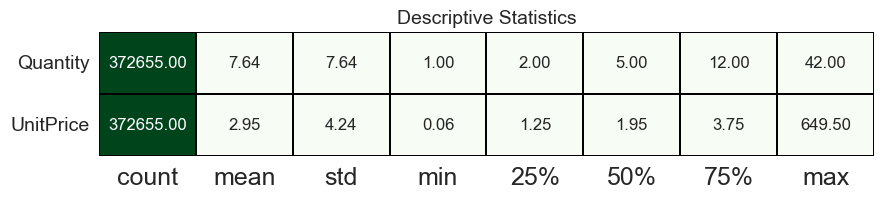

In [37]:
desc_stats(df[['Quantity','UnitPrice']])

In [38]:
df.sample(15)

InvoiceNo StockCode                       Description  Quantity  \
98129     544670     22859          EASTER TIN BUNNY BOUQUET         3   
377983    569574     22738         RIBBON REEL SNOWY VILLAGE        10   
56089     541021     22846        BREAD BIN DINER STYLE RED          4   
26296     538508    84030E     ENGLISH ROSE HOT WATER BOTTLE         1   
170406    551291     22562            MONSTERS STENCIL CRAFT        12   
354484    567880     84879     ASSORTED COLOUR BIRD ORNAMENT        16   
422913    573123     21498               RED RETROSPOT WRAP         25   
526326    580661     22586  FELTCRAFT HAIRBAND PINK AND BLUE         2   
111373    545718     22634    CHILDS BREAKFAST SET SPACEBOY          2   
111973    545853     22863                SOAP DISH BROCANTE         4   
255539    559356     23245        SET OF 3 REGENCY CAKE TINS         4   
101967    544940     21916   SET 12 RETRO WHITE CHALK STICKS        24   
52172     540691     22467                 GUMBALL COAT RACK        12   
257936    559548     85211            S/4 GROOVY CAT MAGNETS         7   
441709    574624     22835   HOT WATER BOTTLE I AM SO POORLY         4   

               InvoiceDate  UnitPrice  CustomerID         Country  
98129  2011-02-22 15:22:00       1.65       16161  United Kingdom  
377983 2011-10-05 10:30:00       1.65       15127  United Kingdom  
56089  2011-01-13 12:03:00      14.95       13093  United Kingdom  
26296  2010-12-12 13:32:00       4.25       15998  United Kingdom  
170406 2011-04-27 14:26:00       1.06       14298  United Kingdom  
354484 2011-09-22 14:56:00       1.69       15398  United Kingdom  
422913 2011-10-27 16:23:00       0.42       13654  United Kingdom  
526326 2011-12-05 13:52:00       0.85       17218  United Kingdom  
111373 2011-03-07 10:22:00       9.95       12614         Germany  
111973 2011-03-07 13:50:00       2.95       16517  United Kingdom  
255539 2011-07-07 18:29:00       4.95       15416  United Kingdom  
101967 2011-02-25 10:19:00       0.42       16592  United Kingdom  
52172  2011-01-11 08:50:00       2.65       17450  United Kingdom  
257936 2011-07-10 15:17:00       0.79       17997  United Kingdom  
441709 2011-11-06 11:20:00       4.95       17769  United Kingdom

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul> 
<li> It appears that our data has been cleaned; let's review it.  
</ul>
</div>

<a id="8"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800"> Feature Engineering</p>

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> The practice of adding new features or changing current features to enhance a machine-learning model's performance is known as <font color="DARKCYAN"><b>feature engineering.</b></font> 
<li> It entails extracting pertinent information from unstructured data and converting it into a form that a model can easily understand. 
<li> The objective is to increase model accuracy by supplying more useful and pertinent data.In order to enhance the performance of a machine learning model, it is the act of generating additional features or variables from the given data.
     
</ul>
</div>

In [39]:
df.sample(10)

InvoiceNo StockCode                        Description  Quantity  \
104011    545085     71053                WHITE METAL LANTERN         2   
469046    576570     21121  SET/10 RED POLKADOT PARTY CANDLES         2   
399291    571276     23533             WALL ART GARDEN HAVEN          1   
398118    571221     23132   SMALL IVORY HEART WALL ORGANISER         4   
325570    565445     23334           IVORY WICKER HEART SMALL         5   
449       536408     22178    VICTORIAN GLASS HANGING T-LIGHT        12   
175547    551966     22975         SPACEBOY CHILDRENS EGG CUP         2   
128348    547253     21688     SILVER PLATE CANDLE BOWL SMALL         6   
237735    557884     79403                FROSTED WHITE BASE         12   
51045     540635     22855                 FINE WICKER HEART         12   

               InvoiceDate  UnitPrice  CustomerID         Country  
104011 2011-02-28 11:19:00       3.75       15039  United Kingdom  
469046 2011-11-15 13:47:00       1.25       17220  United Kingdom  
399291 2011-10-16 12:30:00       5.95       14702  United Kingdom  
398118 2011-10-14 13:35:00       5.75       16416  United Kingdom  
325570 2011-09-04 14:50:00       0.63       13548  United Kingdom  
449    2010-12-01 11:41:00       1.25       14307  United Kingdom  
175547 2011-05-05 13:14:00       1.25       15356  United Kingdom  
128348 2011-03-22 10:44:00       2.95       13869  United Kingdom  
237735 2011-06-23 13:35:00       0.85       17759  United Kingdom  
51045  2011-01-10 12:03:00       1.25       14229  United Kingdom

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>

<li> We can create new columns from the date data
<li> We can calculate the total amount
<li> Since there are too many countries, I converted them into 2 categories.
     
</ul>
</div>

In [40]:
df["CustomerID"] = df["CustomerID"].astype("int")
df["InvoiceDate"] = df["InvoiceDate"].astype("datetime64")

df['New_Country'] = df.apply(lambda x: 'United Kingdom' if x['Country']
                             == 'United Kingdom' else 'Other Country', axis=1)
df['Year'] = df['InvoiceDate'].dt.strftime("%Y")
df['Month'] = df['InvoiceDate'].dt.strftime("%m")
df['Weekday'] = df['InvoiceDate'].dt.strftime("%w")
df['Day'] = df['InvoiceDate'].dt.strftime("%d")
df['Hour'] = df['InvoiceDate'].dt.strftime("%H")
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [41]:
df.sample(10)

InvoiceNo StockCode                          Description  Quantity  \
539134    581433     21111   SWISS ROLL TOWEL, CHOCOLATE  SPOTS        24   
31255     538910     22776          SWEETHEART CAKESTAND 3 TIER         1   
473205    576784     22466       FAIRY TALE COTTAGE NIGHT LIGHT         4   
340044    566604     22629                  SPACEBOY LUNCH BOX          3   
159487    550339     22424               ENAMEL BREAD BIN CREAM         1   
124043    546944     22577  WOODEN HEART CHRISTMAS SCANDINAVIAN         8   
533935    581125    85040A      S/4 PINK FLOWER CANDLES IN BOWL         1   
266927    560276     20978               36 PENCILS TUBE SKULLS         2   
192431    553412     22841         ROUND CAKE TIN VINTAGE GREEN         2   
202428    554392     21616      4 PEAR BOTANICAL DINNER CANDLES         2   

               InvoiceDate  UnitPrice  CustomerID         Country  \
539134 2011-12-08 15:54:00       1.25       14911            EIRE   
31255  2010-12-15 10:54:00       9.95       17454  United Kingdom   
473205 2011-11-16 13:40:00       1.95       16204  United Kingdom   
340044 2011-09-13 16:26:00       1.95       16279  United Kingdom   
159487 2011-04-17 15:40:00      12.75       17697  United Kingdom   
124043 2011-03-18 11:13:00       0.85       14701  United Kingdom   
533935 2011-12-07 12:41:00       1.65       14087  United Kingdom   
266927 2011-07-17 15:11:00       1.25       14606  United Kingdom   
192431 2011-05-17 09:40:00       7.95       14344  United Kingdom   
202428 2011-05-24 12:04:00       3.75       14534  United Kingdom   

           New_Country  Year Month Weekday Day Hour  Total_Price  
539134   Other Country  2011    12       4  08   15        30.00  
31255   United Kingdom  2010    12       3  15   10         9.95  
473205  United Kingdom  2011    11       3  16   13         7.80  
340044  United Kingdom  2011    09       2  13   16         5.85  
159487  United Kingdom  2011    04       0  17   15        12.75  
124043  United Kingdom  2011    03       5  18   11         6.80  
533935  United Kingdom  2011    12       3  07   12         1.65  
266927  United Kingdom  2011    07       0  17   15         2.50  
192431  United Kingdom  2011    05       2  17   09        15.90  
202428  United Kingdom  2011    05       2  24   12         7.50

<a id="9"></a>
# <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Exploratory Data Analysis</p>

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>

<li><font color="DARKCYAN"><b>Exploratory data analysis (EDA)</b></font> is the process of analyzing data using simple concepts from statistics and probability theory and presenting the results in an easy-to-understand format that supports visuals.
<li> Ask a question answer based on data
<li> Our manager is asking for specific reports and presentations. 
     
</ul>
</div>

<a id="10"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">The Rate Of Canceled Orders</p>



In [42]:
retail_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55    17850.00  United Kingdom  
1  2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
2  2010-12-01 08:26:00       2.75    17850.00  United Kingdom  
3  2010-12-01 08:26:00       3.39    17850.00  United Kingdom  
4  2010-12-01 08:26:00       3.39    17850.00  United Kingdom

In [43]:
retail_data["Cancellation"]=retail_data['InvoiceNo'].astype(str).str.contains('^[C]', regex=True)*1

retail_data.groupby("Cancellation")["InvoiceNo"].nunique()

Cancellation
0    22064
1     3836
Name: InvoiceNo, dtype: int64

In [44]:
con1 = retail_data["Cancellation"] == 0

con2 = retail_data["Quantity"] < 0

retail_data[(con1) & (con2)]['Description'].value_counts(dropna=False)

NaN                                    862
check                                  120
damages                                 45
damaged                                 42
?                                       41
                                      ... 
POSSIBLE DAMAGES OR LOST?                1
MERCHANT CHANDLER CREDIT ERROR, STO      1
mystery! Only ever imported 1800         1
sold as 22467                            1
lost                                     1
Name: Description, Length: 139, dtype: int64

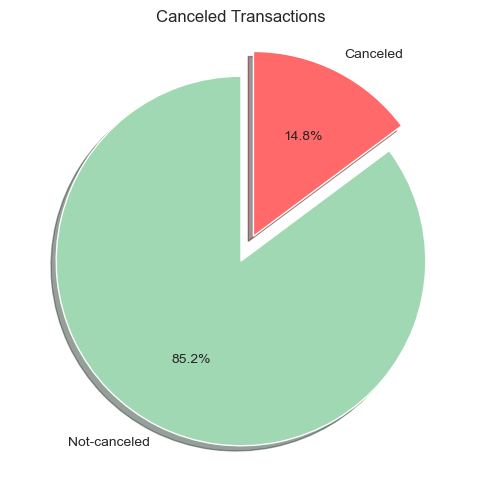

In [45]:
fig = plt.figure(figsize =(8, 6))
plt.pie(retail_data.groupby("Cancellation")["InvoiceNo"].nunique(), 
        labels = ["Not-canceled","Canceled"], 
        autopct='%1.1f%%',
        explode = (0,0.15),
       colors= ['#A0D8B3','#FF6969'],
       shadow=True, startangle=90)
plt.title("Canceled Transactions")
plt.show()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>

<li> We need to examine why they were canceled
<li> In the description part, there are words like damaged, lost, etc.
<li> How did the damages or losses happen, and how can we avoid them in the future?
<li> We can consult the required departments to identify the solution's road plan.     
</ul>
</div>

<a id="11"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Descriptive Statistics</p>


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>

<li>Descriptive statistics is a branch of statistics that deals with the collection, analysis, interpretation, and presentation of data.
<li>  It is used to encapsulate and characterize a dataset's key characteristics, including central tendency, variability, and distribution. 
<li> The initial phase in data analysis is frequently descriptive statistics, which is used to discover patterns and comprehend the data
     
</ul>
</div>

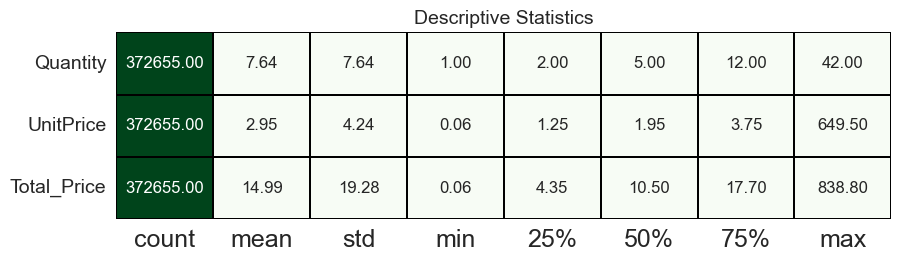

In [46]:
desc_stats(df[['Quantity','UnitPrice','Total_Price']])

<a id="12"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Best Customer And Product </p>

In [47]:
df_Product=df.groupby(['Description']).agg({'Quantity': ['sum',np.size],'Total_Price':['sum']})

df_Product.columns = ['Quantity_sum', 'Quantity_size', 'TotalPrice_sum']

df_Product = df_Product.sort_values(by='Quantity_sum',ascending=False)[:10].reset_index()

df_Product

Description  Quantity_sum  Quantity_size  \
0  WHITE HANGING HEART T-LIGHT HOLDER         18503           1909   
1       ASSORTED COLOUR BIRD ORNAMENT         18359           1284   
2     PACK OF 72 RETROSPOT CAKE CASES         15022            946   
3             JUMBO BAG RED RETROSPOT         14173           1390   
4             LUNCH BAG RED RETROSPOT         11022           1234   
5               HEART OF WICKER SMALL          9818            951   
6     PAPER CHAIN KIT 50'S CHRISTMAS           9513            960   
7            REGENCY CAKESTAND 3 TIER          9182           1678   
8     VICTORIAN GLASS HANGING T-LIGHT          9125            704   
9              JAM MAKING SET PRINTED          9031            819   

   TotalPrice_sum  
0        51472.01  
1        31026.71  
2         8297.48  
3        28959.90  
4        18217.50  
5        15683.91  
6        27085.23  
7       107312.35  
8        13066.98  
9        13285.75

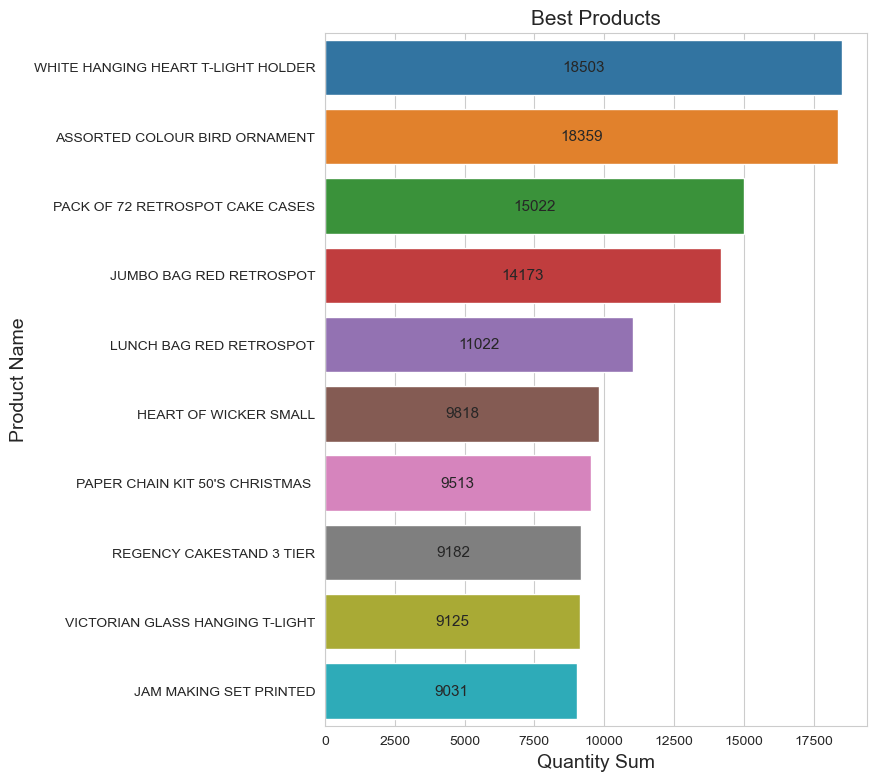

In [48]:
plt.figure(figsize=(7,9))
ax = sns.barplot(x=df_Product.Quantity_sum, y=df_Product.Description)
plt.yticks(fontsize=10)
plt.ylabel("Product Name", fontsize=14)
plt.xlabel("Quantity Sum", fontsize=14)
plt.title("Best Products", fontsize=15)
ax.bar_label(ax.containers[0], label_type="center", fontsize=11);

In [49]:
df_Product2=df.groupby(['Description']).agg({'Quantity': ['sum',np.size],'Total_Price':['sum']})

df_Product2.columns = ['Quantity_sum', 'Quantity_size', 'TotalPrice_sum']

df_Product2 = df_Product2.sort_values(by='TotalPrice_sum',ascending=False)[:10].reset_index()

df_Product2

Description  Quantity_sum  Quantity_size  \
0            REGENCY CAKESTAND 3 TIER          9182           1678   
1  WHITE HANGING HEART T-LIGHT HOLDER         18503           1909   
2                       PARTY BUNTING          7199           1273   
3       ASSORTED COLOUR BIRD ORNAMENT         18359           1284   
4             JUMBO BAG RED RETROSPOT         14173           1390   
5     PAPER CHAIN KIT 50'S CHRISTMAS           9513            960   
6                      SPOTTY BUNTING          4881            977   
7       DOORMAT KEEP CALM AND COME IN          3186            639   
8            JAM MAKING SET WITH JARS          5746            847   
9   SET OF 3 CAKE TINS PANTRY DESIGN           4602           1131   

   TotalPrice_sum  
0       107312.35  
1        51472.01  
2        35587.23  
3        31026.71  
4        28959.90  
5        27085.23  
6        24088.75  
7        23697.49  
8        23279.74  
9        22148.98

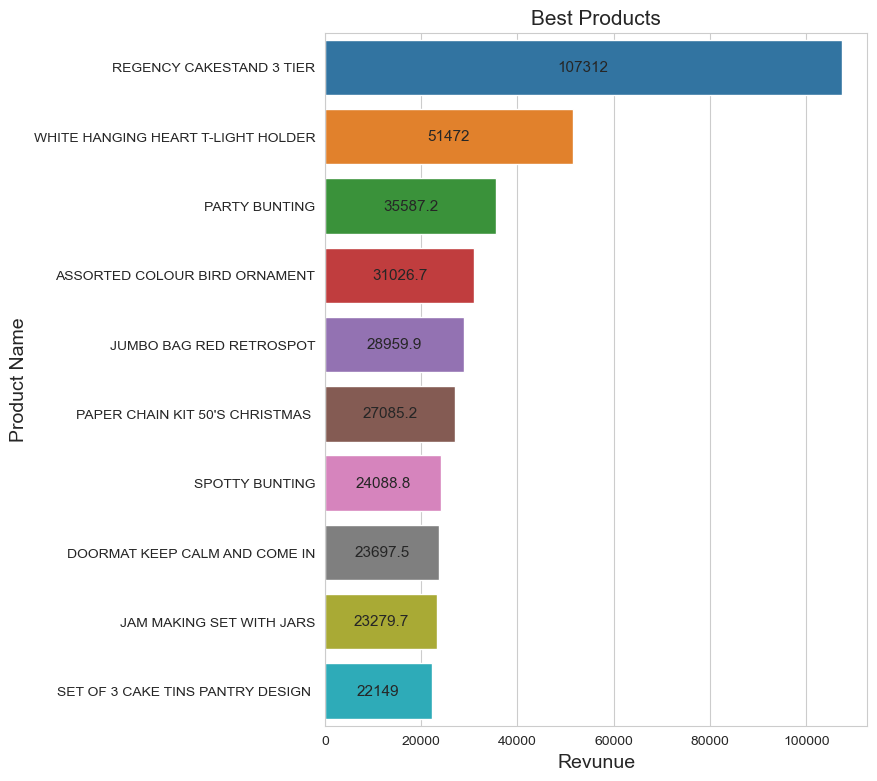

In [50]:
plt.figure(figsize=(7,9))
ax = sns.barplot(x=df_Product2.TotalPrice_sum, y=df_Product2.Description)
plt.yticks(fontsize=10)
plt.ylabel("Product Name", fontsize=14)
plt.xlabel("Revunue", fontsize=14)
plt.title("Best Products", fontsize=15)
ax.bar_label(ax.containers[0], label_type="center", fontsize=11);

In [51]:
df_customer=df.groupby(['CustomerID']).agg({'InvoiceNo':[np.size,np.unique],'Quantity': ['sum'],'Total_Price':['sum']})

df_customer.columns = ['InvoiceNo_size','InvoiceNo_unique','Quantity_sum', 'TotalPrice_sum']

df_customer['len_InvoiceNo_unique']= df_customer['InvoiceNo_unique'].apply(lambda x : len(x))

df_customer = df_customer.sort_values(by='len_InvoiceNo_unique',ascending=False)[:10].reset_index()

df_customer.drop('InvoiceNo_unique',inplace=True,axis=1)

df_customer['CustomerID'] =df_customer['CustomerID'].astype('string')
df_customer

CustomerID  InvoiceNo_size  Quantity_sum  TotalPrice_sum  \
0      12748            4311         16856        25684.07   
1      14911            5302         55766       112919.11   
2      17841            7639         20645        39637.53   
3      13089            1725         23711        48144.76   
4      15311            2081         10463        24025.47   
5      14606            2662          5383        11346.57   
6      12971             252          3833         7762.95   
7      13408             368          7514        16452.88   
8      14646             593          8884        35465.68   
9      14527             970          2086         8506.13   

   len_InvoiceNo_unique  
0                   203  
1                   196  
2                   123  
3                    92  
4                    91  
5                    90  
6                    82  
7                    59  
8                    56  
9                    55

In [52]:
fig = go.Figure(go.Bar(
    x=(df_customer['CustomerID']),y=df_customer['len_InvoiceNo_unique'],
    marker={'color': df_customer['len_InvoiceNo_unique'], 
    'colorscale': 'Viridis'},  
    text=df_customer['len_InvoiceNo_unique'],
    textposition = "inside",
))

fig.update_layout(title_text='Best Customer',xaxis_title="Customer Name ",yaxis_title="Orders ",title_x=0.5)

fig.show()


In [53]:
df_customer2=df.groupby(['CustomerID']).agg({'InvoiceNo':[np.size,np.unique],'Quantity': ['sum'],'Total_Price':['sum']})

df_customer2.columns = ['InvoiceNo_size','InvoiceNo_unique','Quantity_sum', 'TotalPrice_sum']

df_customer2['len_InvoiceNo_unique']= df_customer2['InvoiceNo_unique'].apply(lambda x : len(x))

df_customer2 = df_customer2.sort_values(by='TotalPrice_sum',ascending=False)[:10].reset_index()

df_customer2.drop('InvoiceNo_unique',inplace=True,axis=1)

df_customer2['CustomerID'] =df_customer2['CustomerID'].astype('string')

df_customer2


CustomerID  InvoiceNo_size  Quantity_sum  TotalPrice_sum  \
0      14911            5302         55766       112919.11   
1      14096            5077         15292        50869.05   
2      13089            1725         23711        48144.76   
3      17841            7639         20645        39637.53   
4      14088             506          7973        38513.21   
5      14646             593          8884        35465.68   
6      14298            1223         23819        34183.45   
7      14156            1001         10010        33139.39   
8      12748            4311         16856        25684.07   
9      15311            2081         10463        24025.47   

   len_InvoiceNo_unique  
0                   196  
1                    17  
2                    92  
3                   123  
4                    13  
5                    56  
6                    40  
7                    49  
8                   203  
9                    91

In [54]:
fig = go.Figure(go.Bar(
    x=df_customer2['CustomerID'],
    y=df_customer2['TotalPrice_sum'],
    marker={'color': df_customer2['TotalPrice_sum'], 'colorscale': 'Viridis'},  
    text=[f"{x:.1f}" for x in df_customer2['TotalPrice_sum']],
    textposition="inside",
))

fig.update_layout(
    title_text='Best Customer',
    xaxis_title="Customer Name",
    yaxis_title="Orders",
    title_x=0.5
)

fig.show()



<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>

<li> Best product revunue REGENCY CAKESTAND 3 TIER ,WHITE HANGING HEART T-LIGHT HOLDER, PARTY BUNTING
<li> Best customer revunue 14911, 14096, 13089
     
</ul>
</div>

<a id="13"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">Time Analysis </p>

In [55]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [56]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [57]:
df_time = df.groupby(['Year', 'Month']).agg(
    {'Quantity': ['sum', np.size], 'Total_Price': ['sum']})

df_time.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_time = df_time.reset_index()

df_time['Year_Month'] = df_time.apply(
    lambda x: str(x['Year']) + ' ' + str(x['Month']), axis=1)

df_time

Year Month  Quantity_sum  Product_size  TotalPrice_sum Year_Month
0   2010    12        175335         24424       383754.53    2010 12
1   2011    01        155069         19847       314461.48    2011 01
2   2011    02        142434         18664       293377.40    2011 02
3   2011    03        191665         25445       390882.68    2011 03
4   2011    04        164958         21355       318751.63    2011 04
5   2011    05        210011         26540       439860.42    2011 05
6   2011    06        195403         25382       385641.20    2011 06
7   2011    07        204679         25004       373858.07    2011 07
8   2011    08        212081         25164       391571.07    2011 08
9   2011    09        316039         37496       601636.10    2011 09
10  2011    10        338865         46518       657769.79    2011 10
11  2011    11        421011         60595       811160.16    2011 11
12  2011    12        121005         16221       222260.83    2011 12

In [58]:
fig = px.line(df_time, x="Year_Month", y="Quantity_sum",
              title='Aylık satış', text=round(df_time.Quantity_sum))
fig.update_traces(textposition='top center')

fig.update_layout(title_text='Monthly Purchases Product Quantity',
                  xaxis_title="Month ", yaxis_title="Number Of Quantity ", title_x=0.5)
fig.show()

In [59]:
fig = px.line(df_time, x="Year_Month", y="TotalPrice_sum",  text=round(df_time.TotalPrice_sum))
fig.update_traces(textposition='top center')

fig.update_layout(title_text='Monthly Purchases Revunue',
                  xaxis_title="Month ", yaxis_title="Number Of Revunue ", title_x=0.5)
fig.show()

In [159]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_time["Year_Month"], y=df_time["Quantity_sum"], 
                         mode='lines',
                         name='Quantity',
                         text=df_time["Quantity_sum"],  # Display Quantity_sum values
                         textposition='top center'))  # Position of the text

fig.add_trace(go.Scatter(x=df_time["Year_Month"], y=df_time["TotalPrice_sum"], 
                         mode='lines+markers',
                         name='Revenue',
                         text=df_time["TotalPrice_sum"],  # Display TotalPrice_sum values
                         textposition='top center'))  # Position of the text

fig.update_layout(title_text='Monthly Purchases Revunue Vs Quantity ',
                  xaxis_title="Month ", title_x=0.5)
fig.show()



In [60]:
df_time2 = df.groupby(['Weekday']).agg(
    {'Quantity': ['sum', np.size], 'Total_Price': ['sum']})

df_time2.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_time2 = df_time2.reset_index()

df_time2
# Sunday 0  Monday 1  Tuesday 2  Wednesday 3  Thursday 4  Friday 5  Saturday 6

Weekday  Quantity_sum  Product_size  TotalPrice_sum
0       0        332787         59742       640600.63
1       1        461209         61212       900207.99
2       2        495063         61927       968338.71
3       3        516136         63893      1012636.91
4       4        616734         74605      1220569.00
5       5        426626         51276       842632.12

In [157]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_time2["Weekday"], y=df_time2["Quantity_sum"],
                         text=round(df_time.Quantity_sum),
                         mode='lines',
                         name='Quantity'))
fig.add_trace(go.Scatter(x=df_time2["Weekday"], y=df_time2["TotalPrice_sum"],
                         text=round(df_time.TotalPrice_sum),
                         mode='lines+markers',
                         name='Revunue'))
fig.update_traces(textposition='top center')
fig.show()

In [61]:
fig = px.line(df_time2, x="Weekday", y="TotalPrice_sum",
              title='Gün satış', text=round(df_time2.TotalPrice_sum))

fig.update_layout(title_text='Daily Purchases Revunue',
                  xaxis_title="Daily ", yaxis_title="Number Of Revunue ", title_x=0.5)

fig.update_traces(textposition='top center')
fig.show()

In [62]:
df_time3 = df.groupby(['Hour']).agg(
    {'Quantity': ['sum', np.size], 'Total_Price': ['sum']})

df_time3.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_time3 = df_time3.reset_index()

df_time3

Hour  Quantity_sum  Product_size  TotalPrice_sum
0    06             1             1            4.25
1    07          3263           248         8869.70
2    08         89392          8024       183460.38
3    09        222880         20181       443888.99
4    10        339558         34658       685214.57
5    11        334909         45594       655484.72
6    12        474270         67803       921151.63
7    13        425434         60528       825247.05
8    14        368629         51123       708519.59
9    15        314679         42661       611224.32
10   16        152627         22735       291844.88
11   17         82317         12486       166264.43
12   18         21512          2731        44220.84
13   19         15475          3137        34403.00
14   20          3609           745         5187.01

In [63]:
fig = px.line(df_time3, x="Hour", y="TotalPrice_sum",
              text=round(df_time3.TotalPrice_sum))

fig.update_layout(title_text='Hourly Purchases Revunue',
                  xaxis_title="Hour ", yaxis_title="Number Of Revunue ", title_x=0.5)

fig.update_traces(textposition='top center')
fig.show()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>

<li> The data covers the period from 01.12.20 to 09.12.11.
<li> In September, October, and November, business was booming, likely as a result of the beginning of the season.
<li> Sales increased dramatically in November, presumably as a result of specials and sales days.    
<li> Thursdays saw the biggest sales, while Sundays saw the lowest.
<li> Saturdays are our off day. 
<li> The shop is open from 6:00 to 20:00, with the busiest hours between 10:00 and 15:00.
     
</ul>
</div>

<a id="15"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800"> Country </p>

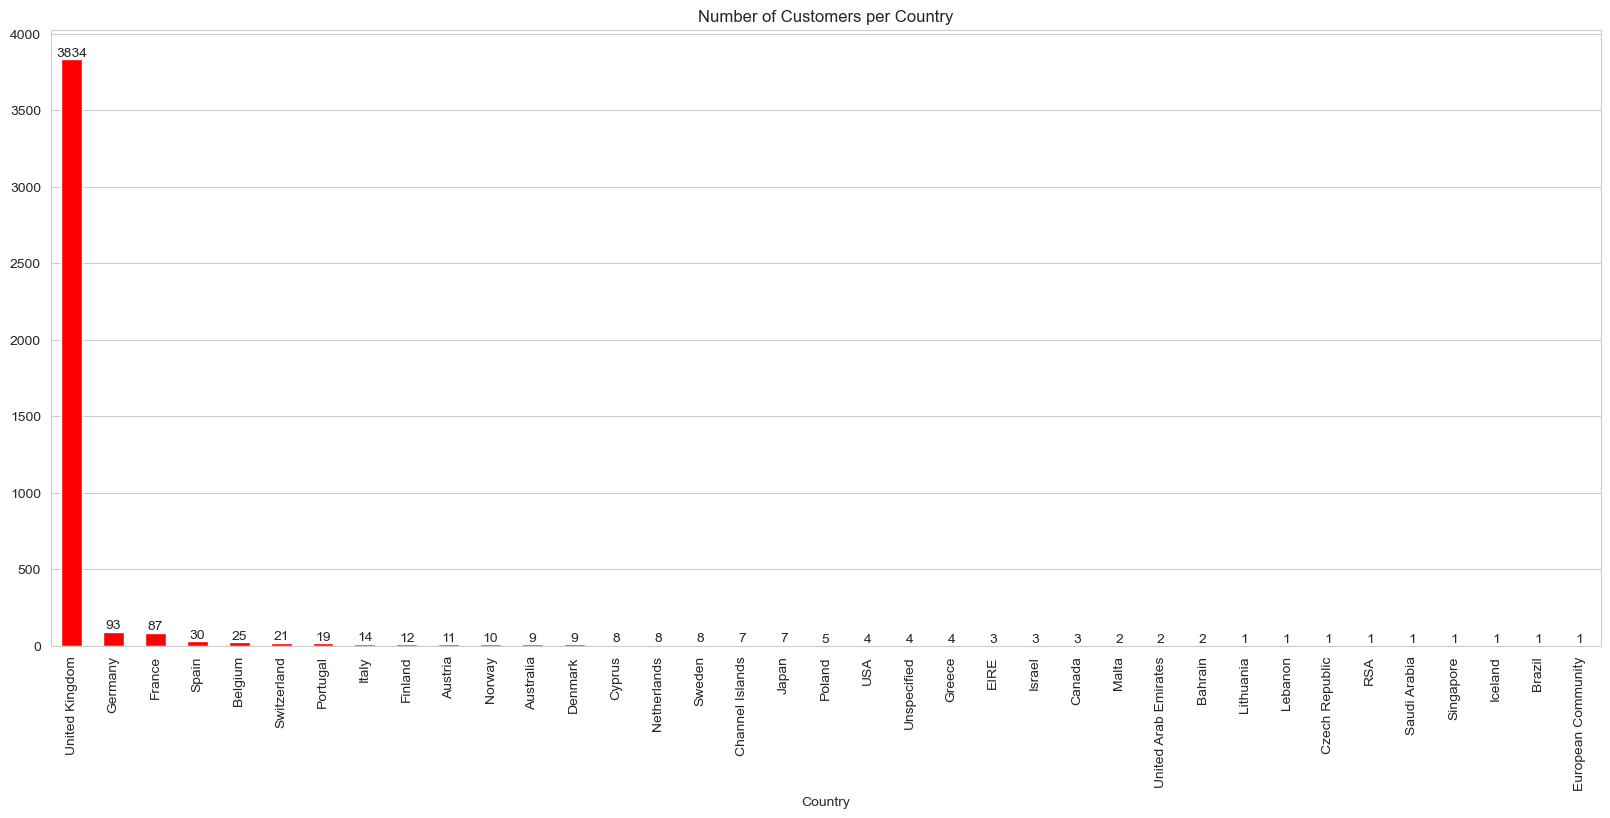

In [64]:
plt.figure(figsize=(20, 8))
ax = df.groupby("Country")["CustomerID"].nunique().sort_values(
    ascending=False).plot(kind="bar", colormap="autumn")
ax.bar_label(ax.containers[0])
plt.title("Number of Customers per Country")
plt.grid(axis="x")

In [65]:
df_Country = df.groupby(['New_Country']).agg(
    {'Quantity': ['sum', np.size], 'Total_Price': ['sum']})

df_Country.columns = ['Quantity_sum', 'Product_size', 'TotalPrice_sum']

df_Country = df_Country.sort_values(
    by='TotalPrice_sum', ascending=False).reset_index()

df_Country['Percent'] = round(df_Country['TotalPrice_sum'] / df_Country['TotalPrice_sum'].sum() * 100, 2)

df_Country

New_Country  Quantity_sum  Product_size  TotalPrice_sum  Percent
0  United Kingdom       2437198        334713      4743209.91    84.93
1   Other Country        411357         37942       841775.45    15.07

In [160]:
fig = go.Figure([go.Pie(labels=df_Country['New_Country'],
                values=df_Country['TotalPrice_sum'], pull=[0, 0.1],
                marker=dict(colors=['#27E1C1','#F6C391']))])

fig.update_traces(hoverinfo='label+percent', textinfo='percent+value',
                  textfont_size=16, insidetextorientation='radial')

fig.update_layout(title=" Country Ratio ", title_x=0.5)
fig.show()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> The majority of our clients are from England.   
</ul>
</div>

 <a id="16"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800">  Daily  Revunue and Quantity </p>

In [67]:
df.Total_Price.sum()

5584985.3599999985

In [68]:
df.Quantity.sum()

2848555

In [69]:
df.Total_Price.sum() / df.Quantity.sum()

1.960638063860448

In [70]:
t1 = datetime(2010, 12, 1)
t2 = datetime(2011, 12, 9)
days=int((t2-t1).days)
#If you don't want to include Saturdays in the calculation because they are holidays, you can exclude these days.
#num_weeks = (days % 7 > 0) + (days // 7) 

In [71]:
df.Total_Price.sum()/days

14973.151099195706

In [72]:
df.Quantity.sum()/days

7636.876675603217

<a id="17"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800"> Inferences That Can Be Derived From Data At First Sight </p>

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> We need to examine why they were canceled  
<li>In the description part, there are words like damaged, lost, etc.How did the damages or losses happen, and how can we avoid them in the future?
<li> We can consult the required departments to identify the solution's road plan. 
<li> Best product revunue REGENCY CAKESTAND 3 TIER ,WHITE HANGING HEART T-LIGHT HOLDER, PARTY BUNTING
<li> Best customer revunue 14911, 14096, 13089  
<li> The data covers the period from 01.12.10 to 09.12.11.  
<li> In September, October, and November, business was booming, likely as a result of the beginning of the season.  
<li> Sales increased dramatically in November, presumably as a result of specials and sales days.  
<li> Saturdays are our off day.
<li> The shop is open from 6:00 to 20:00, with the busiest hours between 10:00 and 15:00.
<li> The majority of our clients are from England.
<li> Daily Revunue 14973
<li> Daily Quantity 7636   
 
    
</ul>
</div>

<a id="18"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800"> RFM Analysis </p>



<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
    
<li>  <font color="DARKCYAN"><b>RFM analysis</b></font>  is a data analysis method used in marketing to divide customers into groups depending on how they transact. 
 <li> <font color="DARKCYAN"><b>Recency, Frequency, and Monetary Value</b></font>   are the three main characteristics that were used to divide the sample of customers for this investigation.
     
<li><font color="DARKCYAN"><b> Recency: </b></font> How recently a consumer has made a purchase is indicated by the variable "recency." Customers who have bought from you more recently are valued more highly than those who haven't bought from you in a while.    
<li> <font color="DARKCYAN"><b> Frequency: </b></font> This variable represents the frequency of a customer's purchases. Customers who shop regularly are viewed as being more valued than those who shop less frequently.   
<li>  <font color="DARKCYAN"><b> Monetary value: </b></font> This variable calculates the amount of money a consumer has spent on products. Customers who have made larger purchases are valued more highly than those who have made smaller purchases. 
<li> Businesses can establish consumer segments that are suited to their particular requirements by combining the analysis of these three characteristics. Customers who have recently made numerous high-value purchases, for instance, may be prioritized and targeted for special promotions or loyalty schemes.    
<li> The development of personalized marketing strategies that speak to each segment's particular requirements and preferences may subsequently be done using these segments.
<li> Since the majority of this data set contains orders from the UK, we can explore the UK market further by finding out what products the customers buy together and any other buying behaviors to improve our sales and targeting strategy.    
</ul>
</div>




In [73]:
df_uk = df.loc[df.Country=="United Kingdom"].copy()
df_uk.reset_index(drop=True)
df_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country     New_Country  \
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  United Kingdom   
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  United Kingdom   
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  United Kingdom   
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  United Kingdom   
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  United Kingdom   

   Year Month Weekday Day Hour  Total_Price  
0  2010    12       3  01   08        15.30  
1  2010    12       3  01   08        20.34  
2  2010    12       3  01   08        22.00  
3  2010    12       3  01   08        20.34  
4  2010    12       3  01   08        20.34

In [74]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334713 entries, 0 to 541893
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    334713 non-null  object        
 1   StockCode    334713 non-null  object        
 2   Description  334713 non-null  object        
 3   Quantity     334713 non-null  int64         
 4   InvoiceDate  334713 non-null  datetime64[ns]
 5   UnitPrice    334713 non-null  float64       
 6   CustomerID   334713 non-null  int32         
 7   Country      334713 non-null  object        
 8   New_Country  334713 non-null  object        
 9   Year         334713 non-null  object        
 10  Month        334713 non-null  object        
 11  Weekday      334713 non-null  object        
 12  Day          334713 non-null  object        
 13  Hour         334713 non-null  object        
 14  Total_Price  334713 non-null  float64       
dtypes: datetime64[ns](1), float64(2), 

In [75]:
# saving df_uk as csv file
df_uk.to_csv("df_uk.csv", index=False)

In [76]:
print(df['InvoiceDate'].max())

2011-12-09 12:50:00


In [77]:
today_date = dt.datetime(2011,12,11)

rfm = df_uk.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today_date - x.max()).days,
                                    'InvoiceNo': lambda x: x.nunique(),
                                    'Total_Price': lambda x: x.sum()})

rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm.reset_index(inplace=True)

rfm

CustomerID  Recency  Frequency  Monetary
0          12747        3         11   4126.41
1          12748        1        203  25684.07
2          12749        4          5   3982.98
3          12820        4          4    923.62
4          12821      215          1     92.72
...          ...      ...        ...       ...
3829       18280      278          1    180.60
3830       18281      181          1     80.82
3831       18282        8          2    164.13
3832       18283        4         16   2039.58
3833       18287       43          3   1283.24

[3834 rows x 4 columns]

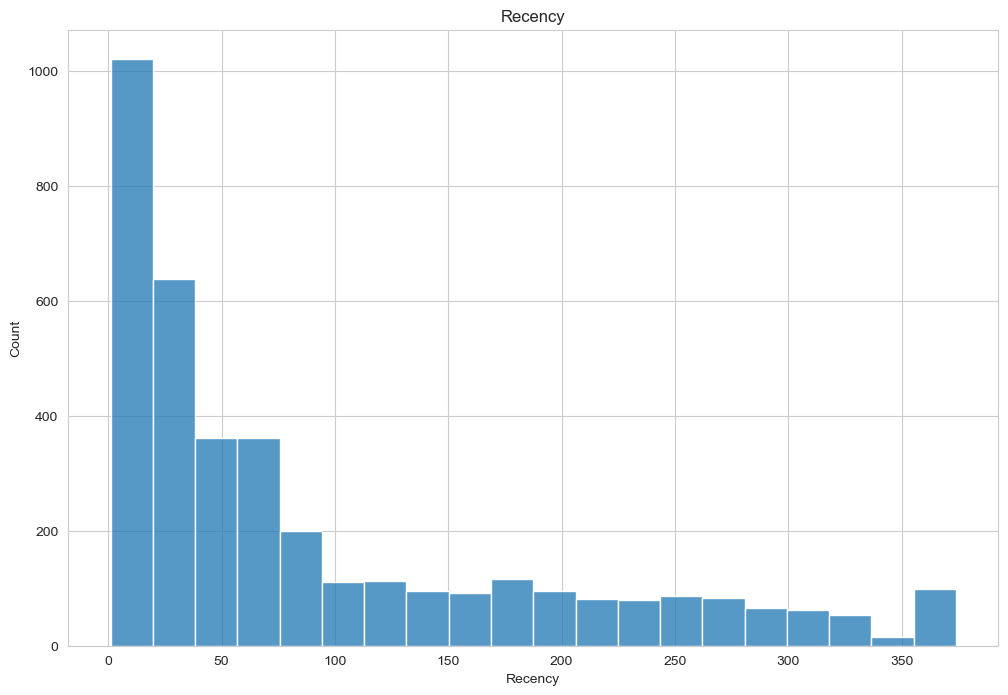

In [78]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.histplot( data=rfm, x="Recency", bins=20)
ax.bar_label(ax.containers[0])
ax.set_title("Recency");

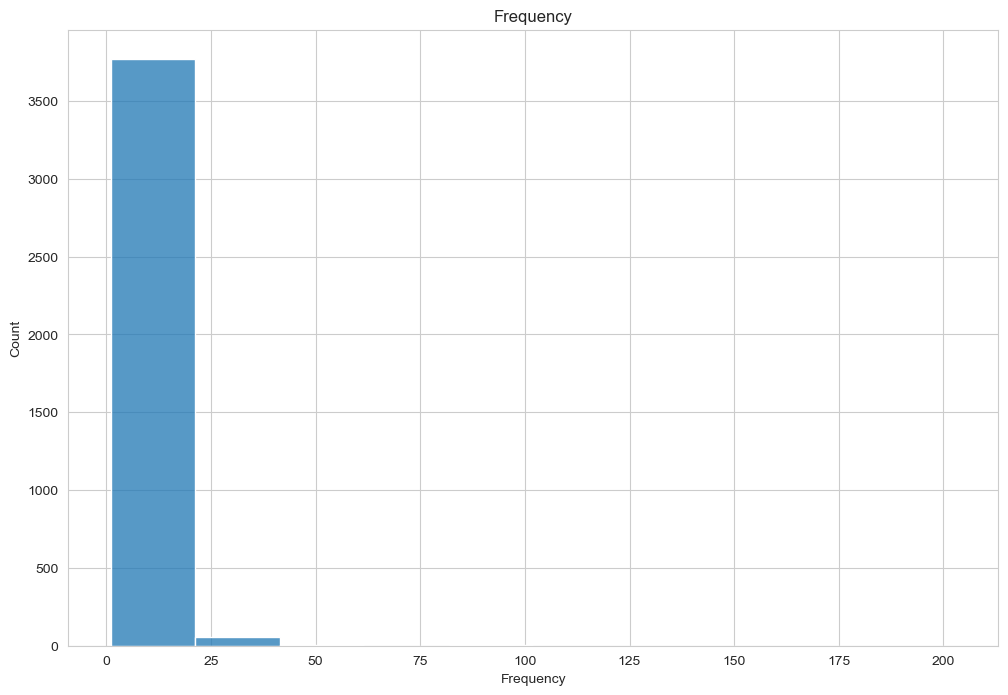

In [79]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.histplot( data=rfm, x="Frequency", bins=10)
ax.bar_label(ax.containers[0])
ax.set_title("Frequency");

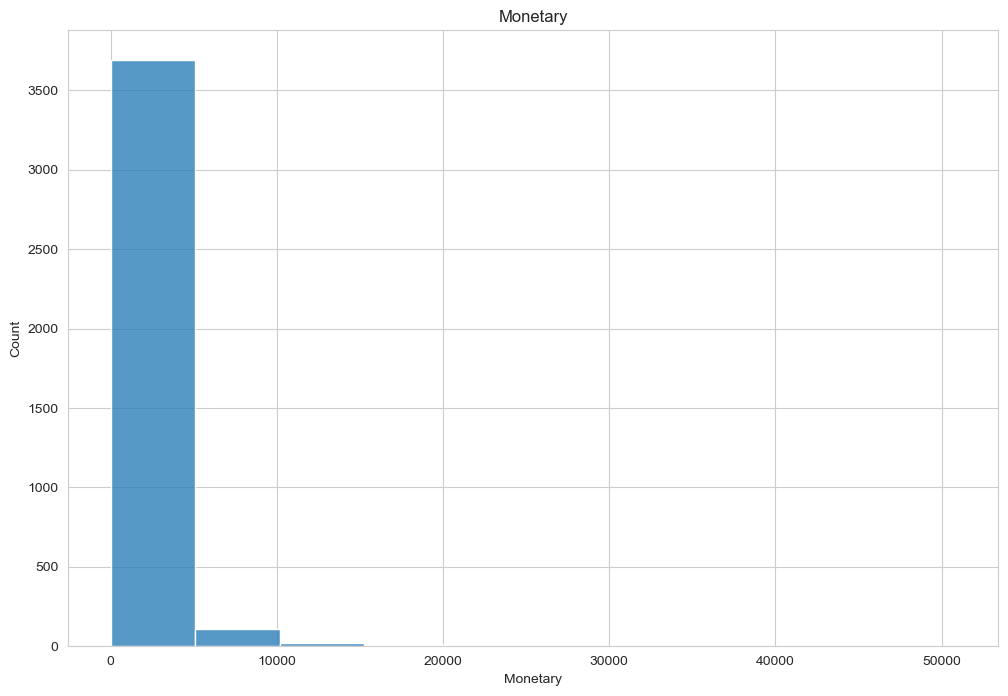

In [80]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.histplot( data=rfm, x="Monetary", bins=10)
ax.bar_label(ax.containers[0])
ax.set_title("Monetary");

In [81]:
# RFM Scores
rfm["Recency_Score"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["Frequency_Score"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["Monetary_Score"] = pd.qcut(rfm['Monetary'], 5, labels = [1,2,3,4,5])
rfm

CustomerID  Recency  Frequency  Monetary Recency_Score Frequency_Score  \
0          12747        3         11   4126.41             5               5   
1          12748        1        203  25684.07             5               5   
2          12749        4          5   3982.98             5               4   
3          12820        4          4    923.62             5               4   
4          12821      215          1     92.72             1               1   
...          ...      ...        ...       ...           ...             ...   
3829       18280      278          1    180.60             1               2   
3830       18281      181          1     80.82             1               2   
3831       18282        8          2    164.13             5               3   
3832       18283        4         16   2039.58             5               5   
3833       18287       43          3   1283.24             3               4   

     Monetary_Score  
0                 5  
1                 5  
2                 5  
3                 4  
4                 1  
...             ...  
3829              1  
3830              1  
3831              1  
3832              5  
3833              4  

[3834 rows x 7 columns]

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
    
<li> The final step is segmentation, which can be calculated in a variety of ways based on your company's goals. I'll test a variety of approaches. 
<li> We occasionally see a weighting of these parameters. A common score can be generated by multiplying, for instance, 60% monetary value, 20% recency value, and 20% frequency value. For a firm, monetary value may be more significant.
<li> This kind of choice should be reviewed with the necessary company personnel, and a consensus should be formed. It is possible to establish some presumptions and rules as well as modify segmentation rules.      
    
</ul>
</div>

In [82]:
rfm['RFM_Score'] = rfm['Recency_Score'].astype(str) + rfm['Frequency_Score'].astype(str) +rfm['Monetary_Score'].astype(str)
rfm['RFM_Level'] = rfm['Recency_Score'].astype(int) + rfm['Frequency_Score'].astype(int) +rfm['Monetary_Score'].astype(int)

In [83]:
rfm.groupby('RFM_Score').agg({
'Recency': ['mean','min','max','count'],
'Frequency': ['mean','min','max','count'],
'Monetary': ['mean','min','max','count'] })

Recency                 Frequency                Monetary          \
             mean  min  max count      mean min  max count     mean     min   
RFM_Score                                                                     
111        286.44  183  374   154      1.00   1    1   154   121.23   10.50   
112        269.19  184  374   113      1.00   1    1   113   295.65  211.50   
113        277.40  183  374    35      1.00   1    1    35   521.35  409.40   
114        260.42  201  339    12      1.00   1    1    12   974.87  775.85   
121        271.27  181  374   124      1.02   1    2   124   119.46    2.90   
...           ...  ...  ...   ...       ...  ..  ...   ...      ...     ...   
551         12.00   12   12     1      7.00   7    7     1   201.12  201.12   
552          5.00    5    5     1      6.00   6    6     1   400.86  400.86   
553          9.00    5   13     5      6.20   6    7     5   699.72  621.68   
554          7.29    1   13    58      7.50   5   12    58  1270.26  801.12   
555          6.02    1   13   321     16.28   5  203   321  5432.80 1643.64   

                          
               max count  
RFM_Score                 
111         207.73   154  
112         403.25   113  
113         741.26    35  
114        1266.23    12  
121         207.50   124  
...            ...   ...  
551         201.12     1  
552         400.86     1  
553         725.10     5  
554        1636.43    58  
555       50869.05   321  

[112 rows x 12 columns]

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
    
<li> We use the <font color="DARKCYAN"><b>121</b></font> segment as a case study
<li> There are  <font color="DARKCYAN"><b>124 people</b></font> in this segment
<li> On average, their most recent purchases were made <font color="DARKCYAN"><b> 271 days ago    </b></font>
<li> On average ,their shopping frequency is<font color="DARKCYAN"><b> 1.02 </b></font>, meaning they have made <font color="DARKCYAN"><b>1</b></font> purchases  
<li>  Their average expenditure is <font color="DARKCYAN"><b>119</b></font> dollars  

</ul>
</div>

In [84]:
rfm.groupby('RFM_Level').agg({
'Recency': ['mean','min','max','count'],
'Frequency': ['mean','min','max','count'],
'Monetary': ['mean','min','max','count'] })

Recency                 Frequency                Monetary          \
             mean  min  max count      mean min  max count     mean     min   
RFM_Level                                                                     
3          286.44  183  374   154      1.00   1    1   154   121.23   10.50   
4          232.25   73  374   321      1.01   1    2   321   181.81    2.90   
5          180.04   34  374   330      1.11   1    3   330   246.78    6.20   
6          124.91   15  374   370      1.31   1    3   370   306.45    5.90   
7           95.71    2  359   338      1.55   1    5   338   399.97   20.80   
8           88.08    2  334   314      1.99   1    6   314   519.14   36.56   
9           68.79    2  303   283      2.49   1    6   283   629.91   43.08   
10          55.72    2  334   309      3.03   1   10   309   853.02   20.92   
11          44.86    1  373   294      3.87   1   34   294  1109.71  201.12   
12          33.32    2  173   286      4.61   2   17   286  1423.46  400.86   
13          24.89    1   72   267      6.26   2   39   267  1964.38  621.68   
14          16.49    1   33   247      8.83   3   44   247  2953.55  801.12   
15           6.02    1   13   321     16.28   5  203   321  5432.80 1643.64   

                          
               max count  
RFM_Level                 
3           207.73   154  
4           403.25   321  
5           741.26   330  
6          1266.23   370  
7          1595.48   338  
8          3109.51   314  
9          2626.30   283  
10         4137.92   309  
11         5525.47   294  
12         5222.10   286  
13        12038.22   267  
14        11257.87   247  
15        50869.05   321

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
    
<li> We use the <font color="DARKCYAN"><b>8</b></font> segment as a case study
<li> There are  <font color="DARKCYAN"><b>314 people</b></font> in this segment
<li> On average, their most recent purchases were made <font color="DARKCYAN"><b> 88 days ago    </b></font>
<li> On average ,their shopping frequency is<font color="DARKCYAN"><b> 1.99 </b></font>, meaning they have made <font color="DARKCYAN"><b>2</b></font> purchases  
<li>  Their average expenditure is <font color="DARKCYAN"><b>519</b></font> dollars  

</ul>
</div>

<span style="color:#FF6D60;
             font-size:160%;
             font-family:Verdana;">
Segmentation Map

In [85]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_Score'].replace(seg_map, regex = True)
rfm['segment'] = rfm[['segment']].applymap(lambda x: re.sub(r'\d+', ' ', str(x)))
rfm.head()

CustomerID  Recency  Frequency  Monetary Recency_Score Frequency_Score  \
0       12747        3         11   4126.41             5               5   
1       12748        1        203  25684.07             5               5   
2       12749        4          5   3982.98             5               4   
3       12820        4          4    923.62             5               4   
4       12821      215          1     92.72             1               1   

  Monetary_Score RFM_Score  RFM_Level           segment  
0              5       555         15        champions   
1              5       555         15        champions   
2              5       545         14   loyal_customers  
3              4       544         13   loyal_customers  
4              1       111          3      hibernating

In [86]:
rfm.groupby('segment').agg({
'Recency': ['mean','min','max','count'],
'Frequency': ['mean','min','max','count'],
'Monetary': ['mean','min','max','count'] })

Recency                Frequency                Monetary  \
                        mean min  max count      mean min  max count     mean   
segment                                                                         
 about_to_sleep        28.05   2   72   152      2.11   2    3   152   268.05   
 at_Risk               39.00   1   72   160      1.43   1    2   160   660.40   
 cant_loose            50.25  34   65     4      1.75   1    2     4  2118.66   
 hibernating           36.90   2   72   428      1.09   1    2   428   208.79   
 loyal_customers       11.13   1   33   210      3.63   2    5   210  1428.11   
 need_attention        16.32   1   32    95      2.35   2    3    95   585.31   
 new_customers         12.00  12   12     1      7.00   7    7     1   201.12   
 potential_loyalists    6.49   2   13    53      4.04   3    7    53   535.65   
 promising              3.50   3    4     2      3.50   3    4     2   112.46   
at_Risk               155.38  73  374   508      2.82   2    5   508   765.86   
cant_loose            139.49  74  373    59      8.17   5   34    59  1952.08   
champions               6.22   1   13   379     14.94   5  203   379  4795.79   
hibernating           217.88  73  374   942      1.09   1    2   942   296.04   
loyal_customers        34.06  15   72   727      6.24   3   44   727  1931.23   
need_attention         53.35  34   72   114      2.39   2    3   114   964.34   

                                             
                         min      max count  
segment                                      
 about_to_sleep        43.08   408.90   152  
 at_Risk              410.93  1537.95   160  
 cant_loose          1650.89  2626.30     4  
 hibernating            5.90   409.00   428  
 loyal_customers      775.38  4211.15   210  
 need_attention       409.50   768.97    95  
 new_customers        201.12   201.12     1  
 potential_loyalists  220.10   745.06    53  
 promising             20.92   204.00     2  
at_Risk                50.40  4137.92   508  
cant_loose             70.02  5525.47    59  
champions             801.12 50869.05   379  
hibernating             2.90  3109.51   942  
loyal_customers        36.56 12038.22   727  
need_attention        409.10  3291.37   114

In [87]:
rfm["RFM_Score"]=rfm["RFM_Score"].astype('int')
rfm.head()

CustomerID  Recency  Frequency  Monetary Recency_Score Frequency_Score  \
0       12747        3         11   4126.41             5               5   
1       12748        1        203  25684.07             5               5   
2       12749        4          5   3982.98             5               4   
3       12820        4          4    923.62             5               4   
4       12821      215          1     92.72             1               1   

  Monetary_Score  RFM_Score  RFM_Level           segment  
0              5        555         15        champions   
1              5        555         15        champions   
2              5        545         14   loyal_customers  
3              4        544         13   loyal_customers  
4              1        111          3      hibernating

<span style="color:#FF6D60;
             font-size:160%;
             font-family:Verdana;">
Segmentation Function

In [161]:
def rfm_level_segment(data):
    """
    Returns a customer segment label based on their RFM score.

    Parameters:
    data (int): The RFM score of the customer, ranging from 1 to 15.

    Returns:
    str: A label indicating the customer segment, which can be one of the following:
         - 'Best Customer': RFM score of 15
         - 'Loyal Customer': RFM score between 12 and 15
         - 'Spenders': RFM score between 9 and 12
         - 'Almost Lost': RFM score between 6 and 9
         - 'Lost Customers': RFM score less than 6
    """
    if data == 15:
        return 'Best Customer'
    elif data >= 12:
        return 'Loyal Customer'
    elif data >= 9:
        return 'Spenders'
    elif data >= 5:
        return 'Almost Lost'
    else:
        return 'Lost Customers'

In [89]:
rfm["RFM_Level"].apply(rfm_level_segment)

0        Best Customer
1        Best Customer
2       Loyal Customer
3       Loyal Customer
4       Lost Customers
             ...      
3829    Lost Customers
3830    Lost Customers
3831          Spenders
3832     Best Customer
3833          Spenders
Name: RFM_Level, Length: 3834, dtype: object

In [90]:
rfm["Segment2"] = rfm["RFM_Level"].apply(rfm_level_segment)

In [91]:
rfm.groupby('Segment2').agg({
    'Recency': ['mean', 'min', 'max', 'count'],
    'Frequency': ['mean', 'min', 'max', 'count'],
    'Monetary': ['mean', 'min', 'max', 'count']})

Recency                Frequency                Monetary  \
                  mean min  max count      mean min  max count     mean   
Segment2                                                                  
Almost Lost     122.51   2  374  1352      1.48   1    6  1352   364.66   
Best Customer     6.02   1   13   321     16.28   5  203   321  5432.80   
Lost Customers  249.81  73  374   475      1.01   1    2   475   162.17   
Loyal Customer   25.31   1  173   800      6.46   2   44   800  2076.41   
Spenders         56.29   1  373   886      3.14   1   34   886   866.93   

                                       
                   min      max count  
Segment2                               
Almost Lost       5.90  3109.51  1352  
Best Customer  1643.64 50869.05   321  
Lost Customers    2.90   403.25   475  
Loyal Customer  400.86 12038.22   800  
Spenders         20.92  5525.47   886

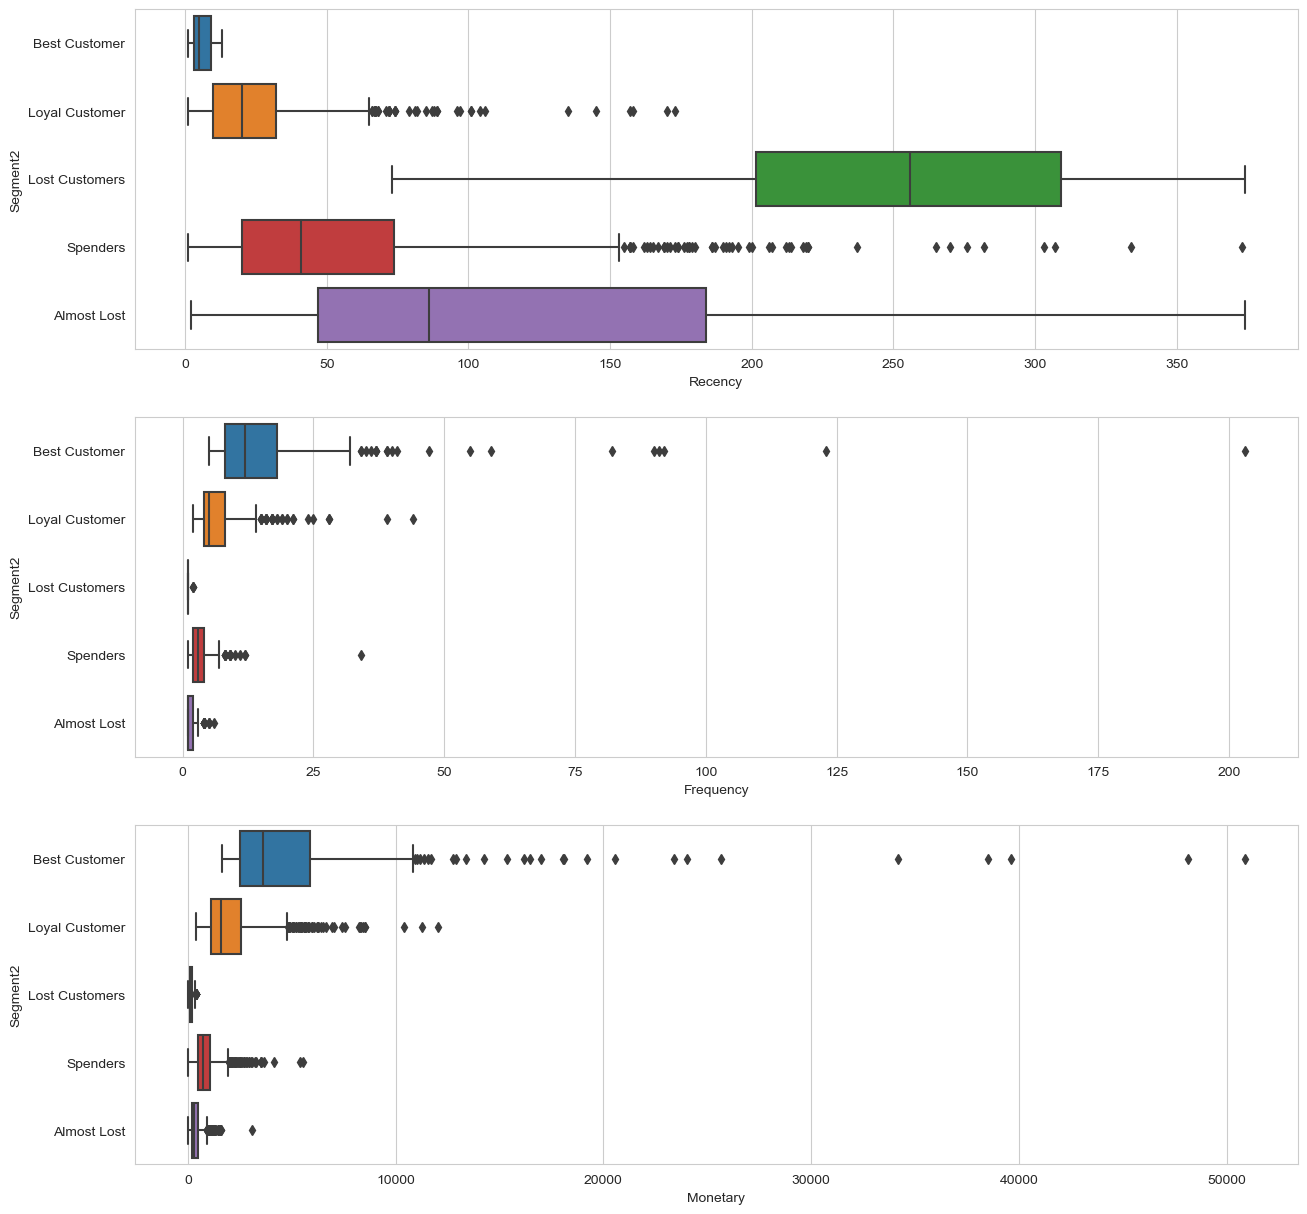

In [92]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.boxplot(y="Segment2", x="Recency", data=rfm)
plt.subplot(3,1,2)
sns.boxplot(y="Segment2", x="Frequency", data=rfm)
plt.subplot(3,1,3)
sns.boxplot(y="Segment2", x="Monetary", data=rfm);

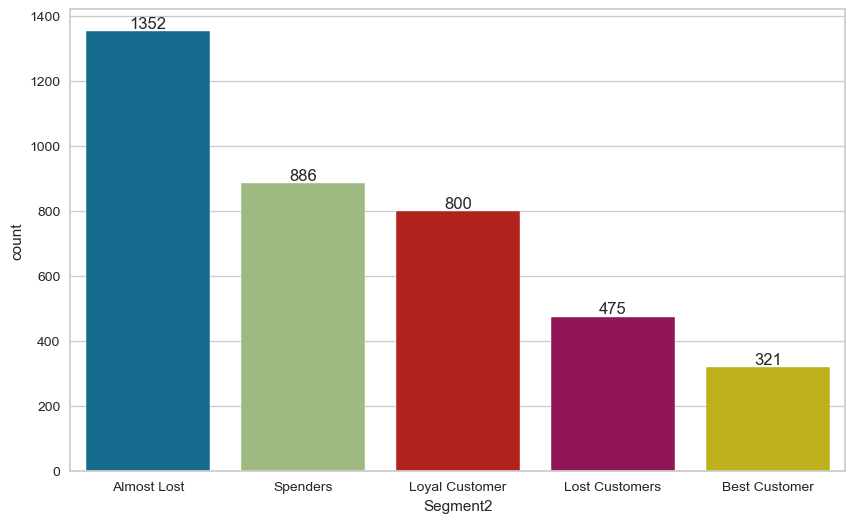

In [162]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.countplot(x=rfm["Segment2"],
                   order=rfm["Segment2"].value_counts().index)
ax.bar_label(ax.containers[0], size=12);

([<matplotlib.patches.Wedge at 0x1c18b6d1a20>,
 [Text(-2.0578862740721617, 1.0271825947636553, 'Almost Lost'),
  Text(-0.4170708049178405, -2.058167132106911, 'Spenders'),
  Text(1.9429338280209145, -0.7968739799566781, 'Loyal Customer'),
  Text(1.66473181640847, 1.2801046751876806, 'Lost Customers'),
  Text(0.5460128726618755, 2.0277746282285727, 'Best Customer')],
 [Text(-1.2526264276960983, 0.6252415794213553, '35.3%'),
  Text(-0.23832617423876598, -1.1760955040610916, '23.1%'),
  Text(1.1102479017262368, -0.4553565599752446, '20.9%'),
  Text(0.9512753236619826, 0.7314883858215318, '12.4%'),
  Text(0.31200735580678596, 1.1587283589877557, '8.4%')])

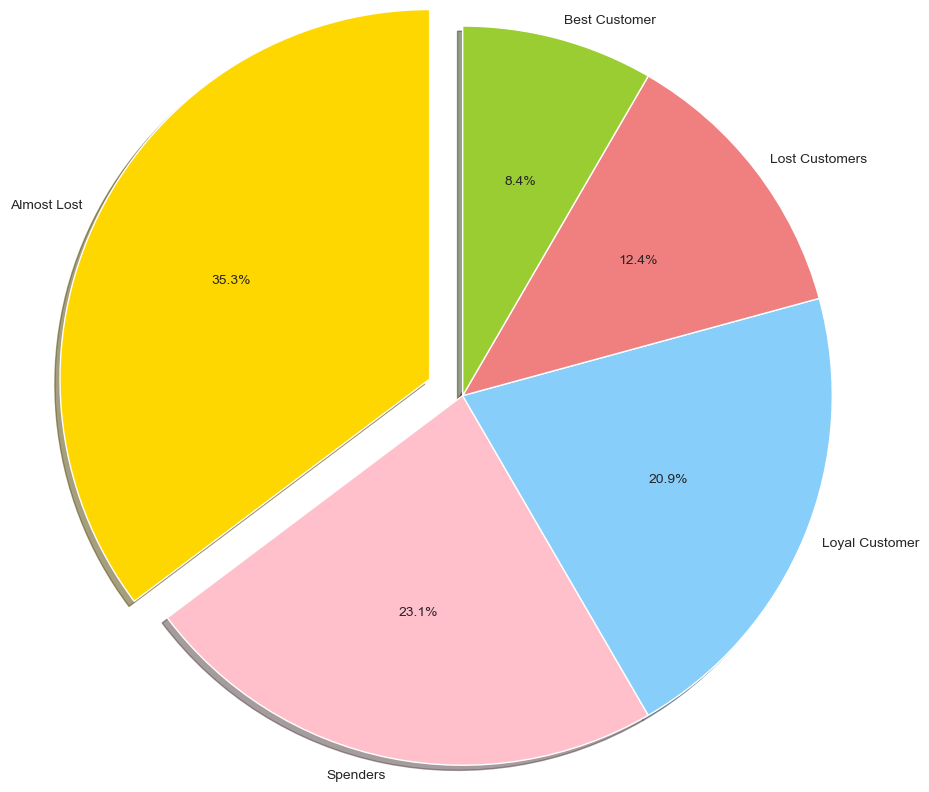

In [94]:
colors_list = ['gold', 'pink', 'lightskyblue', 'lightcoral',  'yellowgreen']
explode_list = [0.2, 0, 0, 0, 0]
plt.pie(rfm["Segment2"].value_counts(),
        labels=rfm["Segment2"].value_counts().index,
        labeldistance=1.05,
        autopct="%.1f%%",
        radius=2.0,
        startangle=90,
        shadow=True,
        pctdistance=0.6,
        colors=colors_list,
        explode=explode_list);

In [95]:
rfm

CustomerID  Recency  Frequency  Monetary Recency_Score Frequency_Score  \
0          12747        3         11   4126.41             5               5   
1          12748        1        203  25684.07             5               5   
2          12749        4          5   3982.98             5               4   
3          12820        4          4    923.62             5               4   
4          12821      215          1     92.72             1               1   
...          ...      ...        ...       ...           ...             ...   
3829       18280      278          1    180.60             1               2   
3830       18281      181          1     80.82             1               2   
3831       18282        8          2    164.13             5               3   
3832       18283        4         16   2039.58             5               5   
3833       18287       43          3   1283.24             3               4   

     Monetary_Score  RFM_Score  RFM_Level           segment        Segment2  
0                 5        555         15        champions    Best Customer  
1                 5        555         15        champions    Best Customer  
2                 5        545         14   loyal_customers  Loyal Customer  
3                 4        544         13   loyal_customers  Loyal Customer  
4                 1        111          3      hibernating   Lost Customers  
...             ...        ...        ...               ...             ...  
3829              1        121          4      hibernating   Lost Customers  
3830              1        121          4      hibernating   Lost Customers  
3831              1        531          9    about_to_sleep        Spenders  
3832              5        555         15        champions    Best Customer  
3833              4        344         11  loyal_customers         Spenders  

[3834 rows x 11 columns]

In [96]:
# saving rfm as csv file
rfm.to_csv("rfm.csv", index=False)

<a id="19"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800"> K Means  </p>
    
<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
    
<li> Using predictive models in conjunction with our RFM model, we can now better understand customer behavior.
<li> Now that we have our customers segmented into different categories, we can gain further insight into customer behavior by using predictive models in conjuction with out RFM model.    
<li> <font color="DARKCYAN"><b>One of the most straightforward and well-liked unsupervised machine learning algorithms is K-means clustering.
<li> Unsupervised algorithms typically draw conclusions from datasets using only input vectors without taking into account predetermined or labelled results.    
<li> The objective of K-means is simple: group similar data points together and discover underlying patterns. K-means searches a dataset for a predetermined number (k) of clusters in order to accomplish this goal.    
<li> Generally, clusters are aggregated data points with certain similarities grouped together. 
<li> You’ll define a target number k, which refers to the number of centroids you need in the dataset.
<li> The location that, whether real or imagined, serves as the cluster's centroid.
<li> Each data point is assigned to a certain cluster by minimizing the total of squares within each cluster.
<li> In other words, the K-means method finds k centroids and then assigns each data point to the closest cluster while minimizing the size of the centroids.  
<li> The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.  </b></font>      
</ul>
</div>

In [97]:
k_means = rfm[['CustomerID',"Recency", "Frequency", "Monetary"]].copy()

In [98]:
k_means.set_index('CustomerID', inplace=True)
k_means

Recency  Frequency  Monetary
CustomerID                              
12747             3         11   4126.41
12748             1        203  25684.07
12749             4          5   3982.98
12820             4          4    923.62
12821           215          1     92.72
...             ...        ...       ...
18280           278          1    180.60
18281           181          1     80.82
18282             8          2    164.13
18283             4         16   2039.58
18287            43          3   1283.24

[3834 rows x 3 columns]

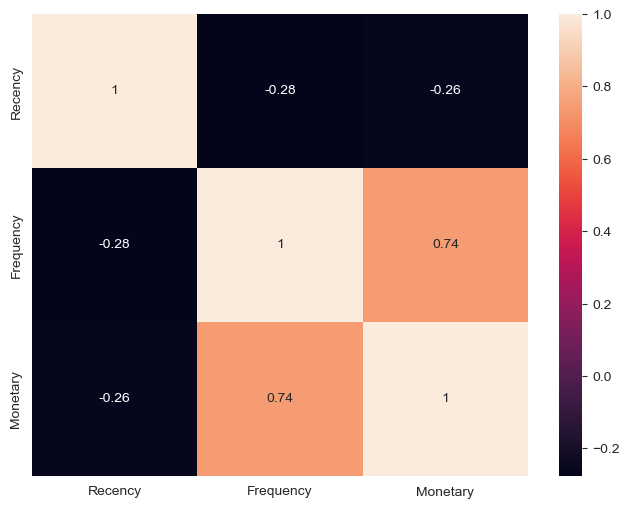

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(data=k_means.corr(), annot=True);

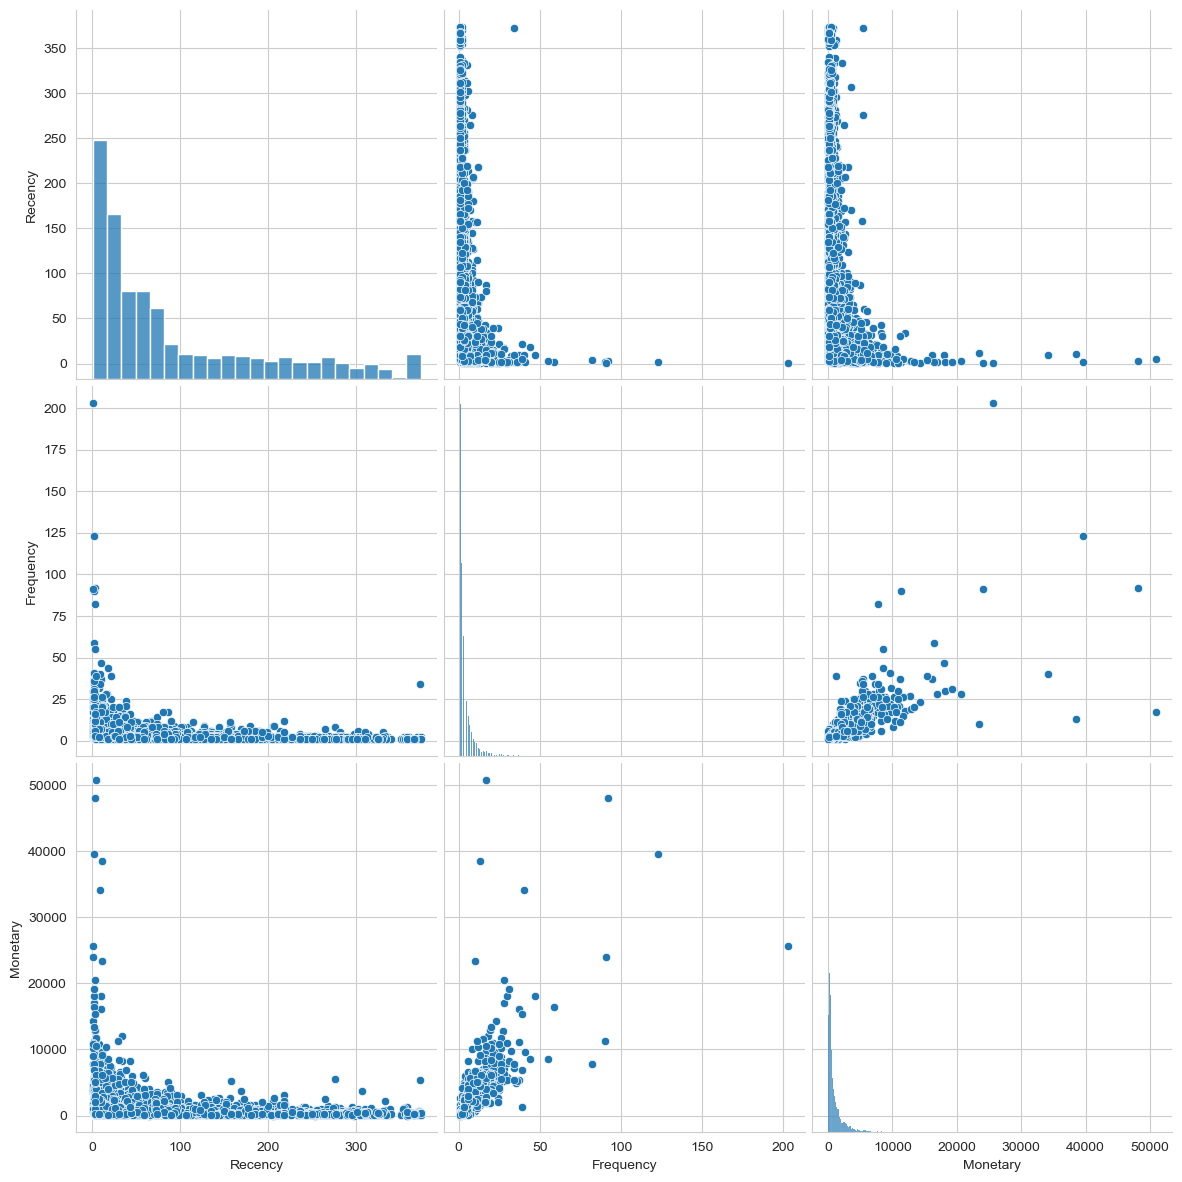

In [100]:
sns.pairplot(k_means, height=4, aspect =1);

<span style="color:#FF6D60;
             font-size:160%;
             font-family:Verdana;">
Data Normalization
    
 
<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> Data normalization is the process of converting numerical data in a dataset to a standard scale, preventing bias towards particular features and enhancing the accuracy and effectiveness of machine learning algorithms.   
 <font color="DARKCYAN"><b>   
<li> When the input features of a dataset have varied scales and units of measurement, normalization is very crucial. This can lead to some factors having an unreasonably high impact on the outcomes while other features may have little or no impact. To make sure that all features contribute equally to the analysis and prediction process, normalization techniques like Min-Max scaling, z-score standardization, and log transformation can be utilized.    
   </b></font>   
</ul>
</div>

In [101]:
k_means.apply(np.log1p)

Recency  Frequency  Monetary
CustomerID                              
12747          1.39       2.48      8.33
12748          0.69       5.32     10.15
12749          1.61       1.79      8.29
12820          1.61       1.61      6.83
12821          5.38       0.69      4.54
...             ...        ...       ...
18280          5.63       0.69      5.20
18281          5.20       0.69      4.40
18282          2.20       1.10      5.11
18283          1.61       2.83      7.62
18287          3.78       1.39      7.16

[3834 rows x 3 columns]

In [102]:
k_means = k_means.apply(np.log1p)

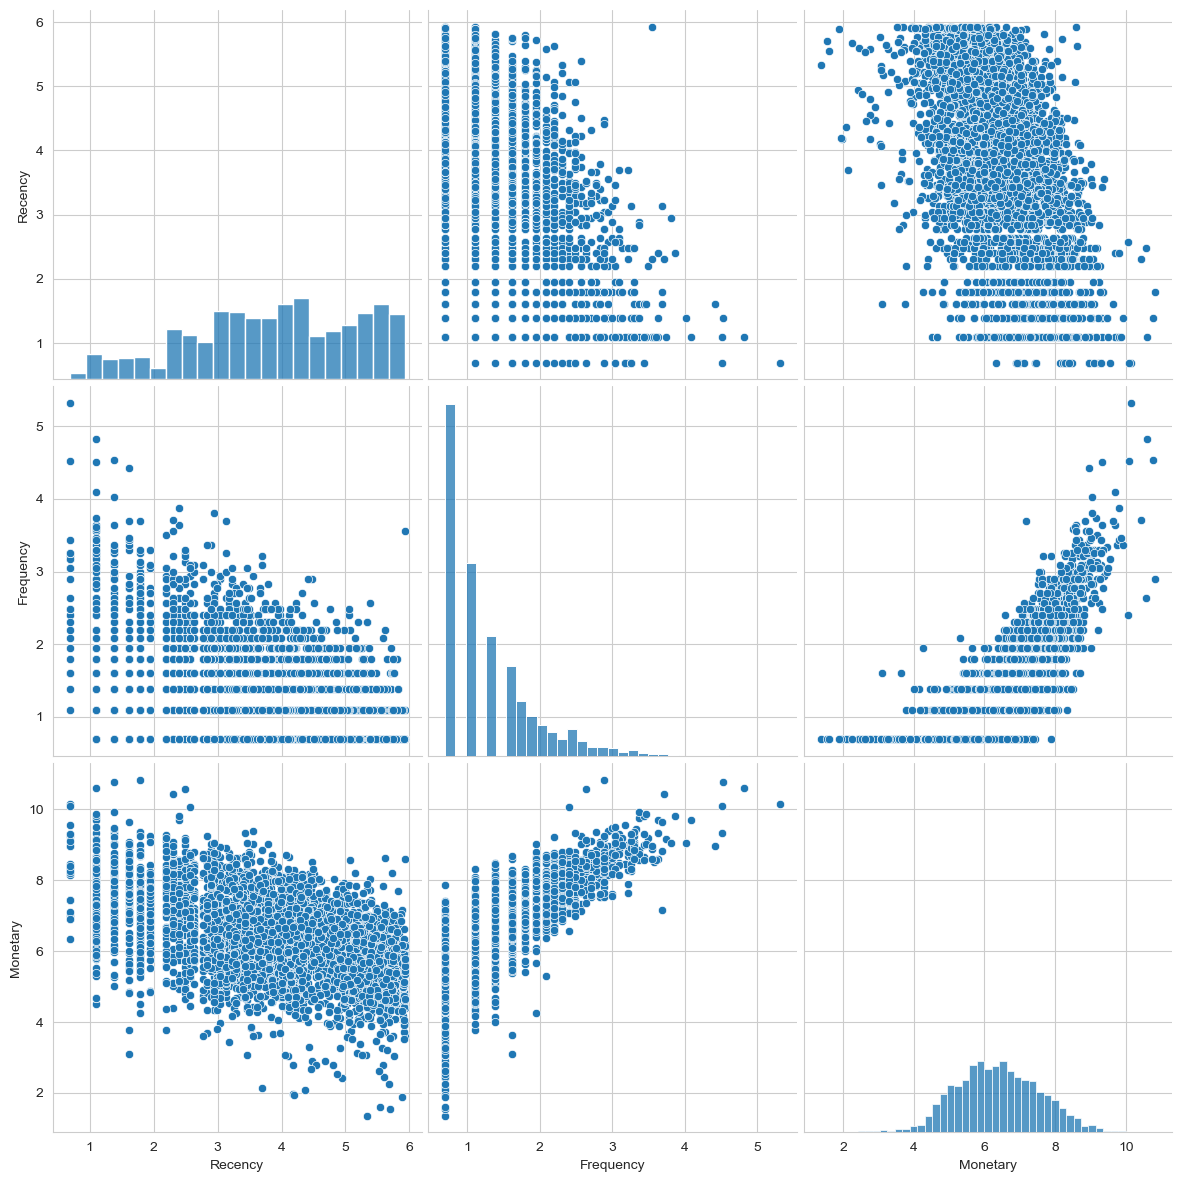

In [103]:
sns.pairplot(k_means, height=4, aspect =1)

<span style="color:#FF6D60;
             font-size:160%;
             font-family:Verdana;">
Hopkins test

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
 
<li> It's vital to determine whether your data sets contain meaningful clusters (i.e., non-random structures) before using any clustering approach on your data. How many clusters are there if the answer is yes. Assessing the clustering tendency or the viability of the clustering analysis is what this method is known as.
<li> A big issue, in cluster analysis, is that clustering methods will return clusters even if the data does not contain any clusters. In other words, if you blindly apply a clustering method on a data set, it will divide the data into clusters because that is what it supposed to do    
<li> The Hopkins statistic (Lawson and Jurs 1990) is used to assess the clustering tendency of a data set by measuring the probability that a given data set is generated by a uniform data distribution. In other words, it tests the spatial randomness of the data    
 
<li> Let’s Define the Null and the alternate hypothesis:

<li> Null hypothesis: the data set D is uniformly distributed (i.e., no meaningful clusters)

<li> Alternative hypothesis: the data set D is not uniformly distributed (i.e., contains meaningful clusters)

<li> We can conduct the Hopkins Statistic test iteratively, using 0.5 as the threshold to reject the alternative hypothesis.

<li> That is, if H < 0.5, then it is unlikely that D has statistically significant clusters.
                         
<li> If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data.    
    
    
</ul>
</div>

In [104]:
from sklearn.neighbors import BallTree

def hopkins_fun(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


In [105]:
hopkins_fun(k_means, k_means.shape[0]) # -->  high cluster tendency

0.06206347080186045

<span style="color:#FF6D60;
             font-size:160%;
             font-family:Verdana;">
Elbow method


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
   
<li> In the Elbow method, we are actually varying the number of clusters (K) from 1 – 10. For each value of K, we are calculating WCSS (Within-Cluster Sum of Square). WCSS is the sum of the squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease. WCSS value is largest when K = 1. When we analyze the graph, we can see that the graph will rapidly change at a point and thus creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. The K value corresponding to this point is the optimal value of K or an optimal number of clusters.
    
</ul>
</div>

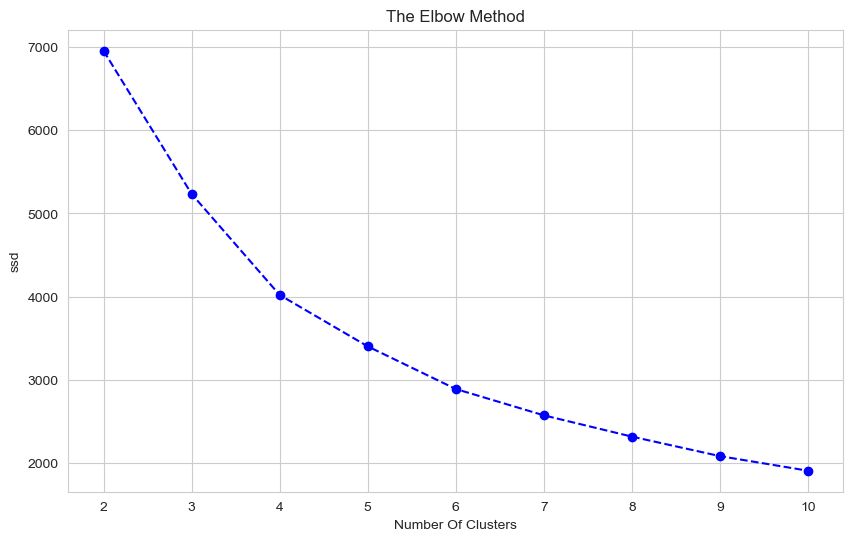

In [106]:
from sklearn.cluster import KMeans

ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(k_means)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo--")
plt.title('The Elbow Method')
plt.xlabel('Number Of Clusters')
plt.ylabel('ssd')
plt.show()

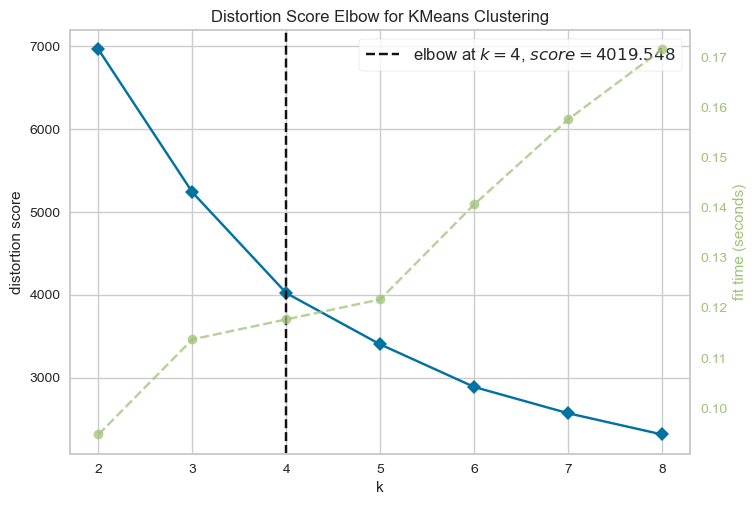

In [107]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(k_means)        # Fit the data to the visualizer
visualizer.poof();

In [108]:
from sklearn.metrics import silhouette_score

In [109]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(k_means)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(k_means, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.41895676691807304
For n_clusters=3, the silhouette score is 0.32986234093198097
For n_clusters=4, the silhouette score is 0.3493559547247039
For n_clusters=5, the silhouette score is 0.33382376237211475
For n_clusters=6, the silhouette score is 0.31536129520524
For n_clusters=7, the silhouette score is 0.3021010274504944
For n_clusters=8, the silhouette score is 0.3034044291174668


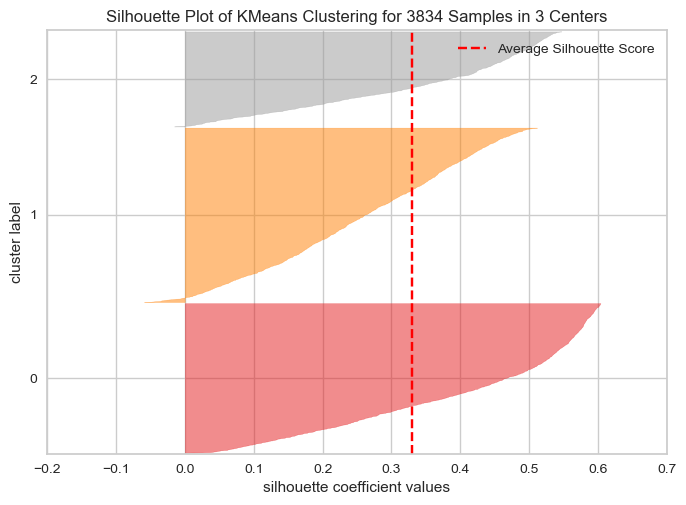

In [110]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=3, random_state=42)          # n_clusters=3
visualizer = SilhouetteVisualizer(model)
visualizer.fit(k_means)   
visualizer.poof();

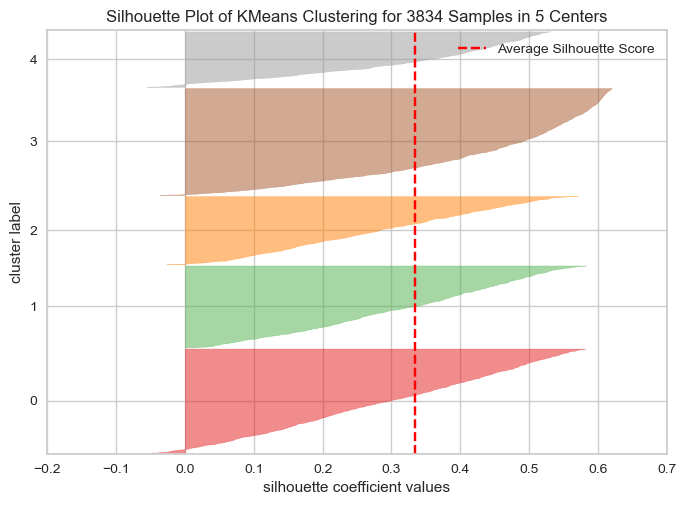

In [111]:
model = KMeans(n_clusters=5, random_state=42)          # n_clusters=5
visualizer = SilhouetteVisualizer(model)
visualizer.fit(k_means)   
visualizer.poof();

<span style="color:#FF6D60;
             font-size:160%;
             font-family:Verdana;">
 Model Fitting

In [112]:
model_kmeans_k3 = KMeans(n_clusters=3, random_state=42)
model_kmeans_k3.fit(k_means)
k_means['cluster_K3']=model_kmeans_k3.predict(k_means)

In [113]:
model_kmeans_k4 = KMeans(n_clusters=4, random_state=42)
model_kmeans_k4.fit(k_means)
k_means['cluster_K4']=model_kmeans_k4.predict(k_means)

In [114]:
model_kmeans_k5 = KMeans(n_clusters=5, random_state=42)
model_kmeans_k5.fit(k_means)
k_means['cluster_K5']=model_kmeans_k5.predict(k_means)

In [115]:
k_means

Recency  Frequency  Monetary  cluster_K3  cluster_K4  cluster_K5
CustomerID                                                                  
12747          1.39       2.48      8.33           2           1           2
12748          0.69       5.32     10.15           2           1           2
12749          1.61       1.79      8.29           2           1           2
12820          1.61       1.61      6.83           2           1           2
12821          5.38       0.69      4.54           0           0           4
...             ...        ...       ...         ...         ...         ...
18280          5.63       0.69      5.20           0           0           1
18281          5.20       0.69      4.40           0           0           4
18282          2.20       1.10      5.11           1           3           0
18283          1.61       2.83      7.62           2           1           2
18287          3.78       1.39      7.16           1           2           3

[3834 rows x 6 columns]

In [116]:
k_means.cluster_K3.value_counts()

1    1596
0    1368
2     870
Name: cluster_K3, dtype: int64

In [117]:
k_means.cluster_K4.value_counts()

0    1328
2     957
1     838
3     711
Name: cluster_K4, dtype: int64

In [118]:
k_means.cluster_K5.value_counts()

3    957
2    838
1    719
0    711
4    609
Name: cluster_K5, dtype: int64

In [119]:
import plotly.express as px

fig = px.scatter_3d(k_means, x='Monetary', y='Frequency', z='Recency',
              color='cluster_K3')
fig.show()

In [120]:
k_means.reset_index(inplace=True)
k_means

CustomerID  Recency  Frequency  Monetary  cluster_K3  cluster_K4  \
0          12747     1.39       2.48      8.33           2           1   
1          12748     0.69       5.32     10.15           2           1   
2          12749     1.61       1.79      8.29           2           1   
3          12820     1.61       1.61      6.83           2           1   
4          12821     5.38       0.69      4.54           0           0   
...          ...      ...        ...       ...         ...         ...   
3829       18280     5.63       0.69      5.20           0           0   
3830       18281     5.20       0.69      4.40           0           0   
3831       18282     2.20       1.10      5.11           1           3   
3832       18283     1.61       2.83      7.62           2           1   
3833       18287     3.78       1.39      7.16           1           2   

      cluster_K5  
0              2  
1              2  
2              2  
3              2  
4              4  
...          ...  
3829           1  
3830           4  
3831           0  
3832           2  
3833           3  

[3834 rows x 7 columns]

In [121]:
rfm['k_means_5'] = k_means ['cluster_K5']

In [122]:
rfm

CustomerID  Recency  Frequency  Monetary Recency_Score Frequency_Score  \
0          12747        3         11   4126.41             5               5   
1          12748        1        203  25684.07             5               5   
2          12749        4          5   3982.98             5               4   
3          12820        4          4    923.62             5               4   
4          12821      215          1     92.72             1               1   
...          ...      ...        ...       ...           ...             ...   
3829       18280      278          1    180.60             1               2   
3830       18281      181          1     80.82             1               2   
3831       18282        8          2    164.13             5               3   
3832       18283        4         16   2039.58             5               5   
3833       18287       43          3   1283.24             3               4   

     Monetary_Score  RFM_Score  RFM_Level           segment        Segment2  \
0                 5        555         15        champions    Best Customer   
1                 5        555         15        champions    Best Customer   
2                 5        545         14   loyal_customers  Loyal Customer   
3                 4        544         13   loyal_customers  Loyal Customer   
4                 1        111          3      hibernating   Lost Customers   
...             ...        ...        ...               ...             ...   
3829              1        121          4      hibernating   Lost Customers   
3830              1        121          4      hibernating   Lost Customers   
3831              1        531          9    about_to_sleep        Spenders   
3832              5        555         15        champions    Best Customer   
3833              4        344         11  loyal_customers         Spenders   

      k_means_5  
0             2  
1             2  
2             2  
3             2  
4             4  
...         ...  
3829          1  
3830          4  
3831          0  
3832          2  
3833          3  

[3834 rows x 12 columns]

In [124]:
rfm.groupby("Segment2", as_index=False)["k_means_5"].value_counts()

Segment2  k_means_5  count
0      Almost Lost          1    552
1      Almost Lost          0    347
2      Almost Lost          4    277
3      Almost Lost          3    176
4    Best Customer          2    321
5   Lost Customers          4    330
6   Lost Customers          1    145
7   Loyal Customer          2    506
8   Loyal Customer          3    251
9   Loyal Customer          0     43
10        Spenders          3    530
11        Spenders          0    321
12        Spenders          1     22
13        Spenders          2     11
14        Spenders          4      2

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
   
<li> Depending on how the business intends to use the findings and the level of detail the business stakeholders want to see in the clusters, we will decide how to proceed with this study. We can also enquire about the range of consumer behavior that the stakeholders are considering, from high to low value customers. Based on the responses, several clustering techniques can be applied to RFM variables or directly to the collection of transaction data.
</ul>
</div>

<a id="20"></a>
## <p style="padding:10px;background-color:#D5CE98;margin:0;color:#006837;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 50px;overflow:hidden;font-weight:800"> Cohort Analysis </p>


<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li> Cohort analysis is a type of behavioral analytics in which you take a group of users, and analyze their usage patterns based on their shared traits to better track and understand their actions.   
<li> Simply said, a cohort is a collection of people who have similar traits.
<li> Cohort analysis is a valuable tool for anyone looking to gain a deeper understanding of their customers and why they make certain choices in your app
<li> Here are a few advantages of performing cohort analysis:
    
<li> 1) Analyze the health of the company: Growing revenue even when you aren't bringing in new clients is a terrific sign of a strong business.Jonathan Parisot, co-founder and CEO at Actiondesk, says that cohort analysis "can help you determine which cohorts/groups of customers are contributing the most to revenue." This, in turn, allows you to focus on upselling other products or services to them.   
    
<li>  2) Understand customers better: Better comprehend your clientele. Through the use of cohort analysis, companies can follow the behavior of their clients through time in order to better understand them.This can help you identify patterns and trends that may not be immediately apparent from looking at vanity metrics.  
    
    
<li> 3) Enhanced customer segmentation:  Businesses can generate more focused and effective marketing campaigns, as well as provide individualized customer experiences, by segmenting user groups and forming specialized cohorts.  

    
<li> 4) Increased customer retention : By examining retention rates and identifying potential churn risks, cohort analysis is helpful. When you have this knowledge, you may act effectively to enhance customer experiences.
    
<li> 5) Optimize your app for increased interest : By seeing trends and patterns in the customer lifecycle, cohort analysis may be used to enhance the user experience and raise customer lifetime value.  
</ul>
</div>

In [129]:
cohort = pd.read_csv("df_uk.csv") 
cohort.sample(5)

InvoiceNo StockCode                        Description  Quantity  \
292220     576769     23583           LUNCH BAG PAISLEY PARK          10   
32897      541684     21199       PINK  HEART CONFETTI IN TUBE         8   
222662     569132     22910  PAPER CHAIN KIT VINTAGE CHRISTMAS         2   
302977     578008     21239                 PINK  POLKADOT CUP         2   
182060     563924     22692        DOORMAT WELCOME TO OUR HOME         1   

                InvoiceDate  UnitPrice  CustomerID         Country  \
292220  2011-11-16 13:14:00       1.65       13575  United Kingdom   
32897   2011-01-20 15:22:00       1.65       15498  United Kingdom   
222662  2011-09-30 13:54:00       2.95       17757  United Kingdom   
302977  2011-11-22 12:47:00       0.85       14657  United Kingdom   
182060  2011-08-21 14:32:00       7.95       15984  United Kingdom   

           New_Country  Year  Month  Weekday  Day  Hour  Total_Price  
292220  United Kingdom  2011     11        3   16    13        16.50  
32897   United Kingdom  2011      1        4   20    15        13.20  
222662  United Kingdom  2011      9        5   30    13         5.90  
302977  United Kingdom  2011     11        2   22    12         1.70  
182060  United Kingdom  2011      8        0   21    14         7.95

In [135]:
cohort.drop(['Year','Country','New_Country','Weekday','Day','Hour'],inplace=True,axis=1)

In [130]:
#First we will create a function, which takes any date and returns the formatted date
#with day value as 1st of the same month and Year.
cohort['InvoiceDate'] = pd.to_datetime(cohort['InvoiceDate'])
cohort['InvoiceMonth'] = cohort['InvoiceDate'].map(lambda x : dt.datetime(x.year, x.month, 1))

In [131]:
cohort.sample(5)

InvoiceNo StockCode                          Description  Quantity  \
300157     577557     22775  PURPLE DRAWERKNOB ACRYLIC EDWARDIAN         2   
33131      541783     22777                   GLASS CLOCHE LARGE         2   
56948      545304     21936             RED RETROSPOT PICNIC BAG         5   
12938      538205     21650       ASSORTED TUTTI FRUTTI BRACELET         2   
313507     579091     21790                   VINTAGE SNAP CARDS        12   

               InvoiceDate  UnitPrice  CustomerID         Country  \
300157 2011-11-20 15:36:00       1.25       15426  United Kingdom   
33131  2011-01-21 11:55:00       8.50       16618  United Kingdom   
56948  2011-03-01 12:51:00       2.95       16212  United Kingdom   
12938  2010-12-10 11:24:00       0.65       12748  United Kingdom   
313507 2011-11-28 10:49:00       0.85       14893  United Kingdom   

           New_Country  Year  Month  Weekday  Day  Hour  Total_Price  \
300157  United Kingdom  2011     11        0   20    15         2.50   
33131   United Kingdom  2011      1        5   21    11        17.00   
56948   United Kingdom  2011      3        2    1    12        14.75   
12938   United Kingdom  2010     12        5   10    11         1.30   
313507  United Kingdom  2011     11        1   28    10        10.20   

       InvoiceMonth  
300157   2011-11-01  
33131    2011-01-01  
56948    2011-03-01  
12938    2010-12-01  
313507   2011-11-01

In [132]:
cohort['FirstInvoiceMonth'] = cohort.groupby('CustomerID')['InvoiceMonth'].transform('min')
cohort["CohortIndex"] = cohort['InvoiceMonth'].dt.to_period('M').astype(int) - cohort['FirstInvoiceMonth'].dt.to_period('M').astype(int)+1

In [136]:
cohort

InvoiceNo StockCode                          Description  Quantity  \
0          536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365     71053                  WHITE METAL LANTERN         6   
2          536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
334708     581585     22466       FAIRY TALE COTTAGE NIGHT LIGHT        12   
334709     581586     22061  LARGE CAKE STAND  HANGING STRAWBERY         8   
334710     581586     23275     SET OF 3 HANGING OWLS OLLIE BEAK        24   
334711     581586     21217        RED RETROSPOT ROUND CAKE TINS        24   
334712     581586     20685                DOORMAT RED RETROSPOT        10   

               InvoiceDate  UnitPrice  CustomerID  Month  Total_Price  \
0      2010-12-01 08:26:00       2.55       17850     12        15.30   
1      2010-12-01 08:26:00       3.39       17850     12        20.34   
2      2010-12-01 08:26:00       2.75       17850     12        22.00   
3      2010-12-01 08:26:00       3.39       17850     12        20.34   
4      2010-12-01 08:26:00       3.39       17850     12        20.34   
...                    ...        ...         ...    ...          ...   
334708 2011-12-09 12:31:00       1.95       15804     12        23.40   
334709 2011-12-09 12:49:00       2.95       13113     12        23.60   
334710 2011-12-09 12:49:00       1.25       13113     12        30.00   
334711 2011-12-09 12:49:00       8.95       13113     12       214.80   
334712 2011-12-09 12:49:00       7.08       13113     12        70.80   

       InvoiceMonth FirstInvoiceMonth  CohortIndex  
0        2010-12-01        2010-12-01            1  
1        2010-12-01        2010-12-01            1  
2        2010-12-01        2010-12-01            1  
3        2010-12-01        2010-12-01            1  
4        2010-12-01        2010-12-01            1  
...             ...               ...          ...  
334708   2011-12-01        2011-05-01            8  
334709   2011-12-01        2010-12-01           13  
334710   2011-12-01        2010-12-01           13  
334711   2011-12-01        2010-12-01           13  
334712   2011-12-01        2010-12-01           13  

[334713 rows x 12 columns]

In [137]:
# Pivot Cohort and Cohort Retention
cohort_user_retention = cohort.groupby(["FirstInvoiceMonth","CohortIndex" ])["CustomerID"].nunique().reset_index()
cohort_user_retention.head()

FirstInvoiceMonth  CohortIndex  CustomerID
0        2010-12-01            1         785
1        2010-12-01            2         275
2        2010-12-01            3         247
3        2010-12-01            4         283
4        2010-12-01            5         277

In [138]:
pivot_user_retention = pd.pivot_table(data=cohort_user_retention, index="FirstInvoiceMonth",  columns="CohortIndex", values="CustomerID")
pivot_user_retention

CohortIndex           1      2      3      4      5      6      7      8   \
FirstInvoiceMonth                                                           
2010-12-01        785.00 275.00 247.00 283.00 277.00 311.00 275.00 261.00   
2011-01-01        348.00  70.00  90.00  79.00 112.00  95.00  87.00  87.00   
2011-02-01        328.00  60.00  65.00  93.00  95.00  84.00  83.00  87.00   
2011-03-01        416.00  64.00 107.00  82.00  94.00  70.00 110.00  98.00   
2011-04-01        269.00  57.00  54.00  57.00  54.00  61.00  61.00  69.00   
2011-05-01        251.00  48.00  42.00  42.00  53.00  57.00  67.00  23.00   
2011-06-01        208.00  36.00  28.00  49.00  50.00  66.00  21.00    NaN   
2011-07-01        172.00  28.00  37.00  41.00  48.00  20.00    NaN    NaN   
2011-08-01        139.00  29.00  31.00  34.00  18.00    NaN    NaN    NaN   
2011-09-01        271.00  62.00  83.00  33.00    NaN    NaN    NaN    NaN   
2011-10-01        322.00  78.00  36.00    NaN    NaN    NaN    NaN    NaN   
2011-11-01        294.00  33.00    NaN    NaN    NaN    NaN    NaN    NaN   
2011-12-01         31.00    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

CohortIndex           9      10     11     12     13  
FirstInvoiceMonth                                     
2010-12-01        269.00 303.00 282.00 390.00 202.00  
2011-01-01        104.00 112.00 125.00  43.00    NaN  
2011-02-01         88.00 102.00  24.00    NaN    NaN  
2011-03-01        114.00  37.00    NaN    NaN    NaN  
2011-04-01         19.00    NaN    NaN    NaN    NaN  
2011-05-01           NaN    NaN    NaN    NaN    NaN  
2011-06-01           NaN    NaN    NaN    NaN    NaN  
2011-07-01           NaN    NaN    NaN    NaN    NaN  
2011-08-01           NaN    NaN    NaN    NaN    NaN  
2011-09-01           NaN    NaN    NaN    NaN    NaN  
2011-10-01           NaN    NaN    NaN    NaN    NaN  
2011-11-01           NaN    NaN    NaN    NaN    NaN  
2011-12-01           NaN    NaN    NaN    NaN    NaN

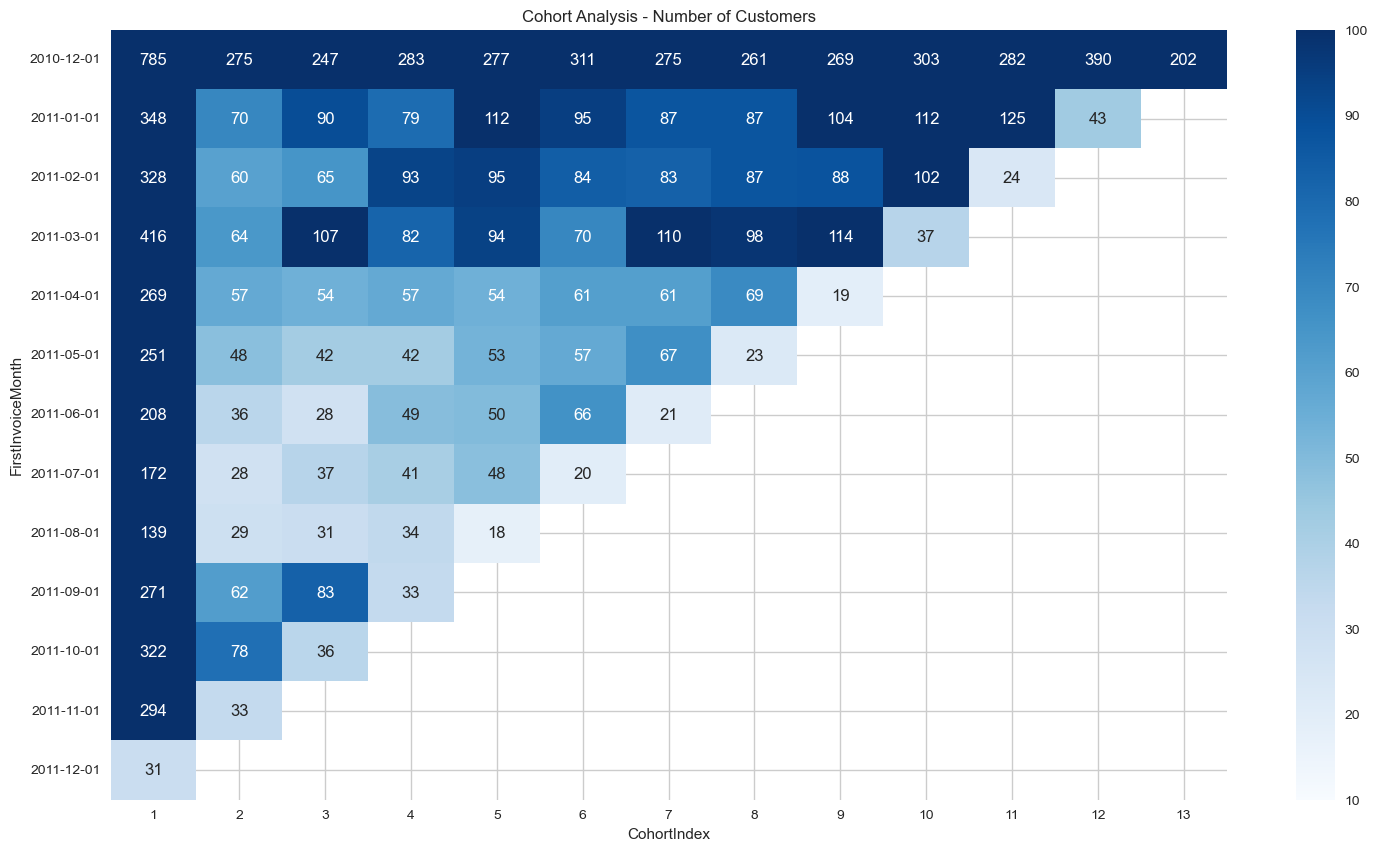

In [139]:
pivot_user_retention.index = pivot_user_retention.index.astype(str)
plt.figure(figsize=(18,10))
plt.title('Cohort Analysis - Number of Customers')
sns.heatmap(data = pivot_user_retention, annot = True,cbar = True,fmt='0.3g',vmin = 10,vmax = 100,cmap = "Blues");

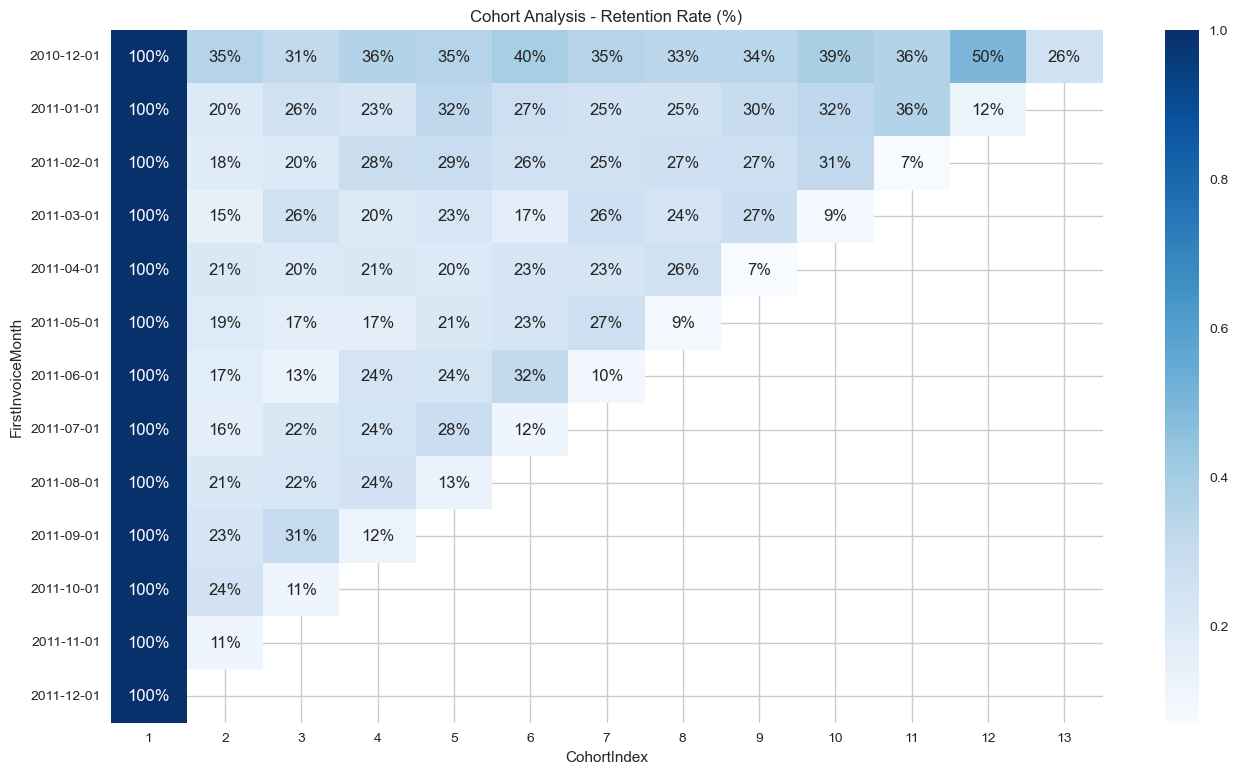

In [140]:
cohort_size = pivot_user_retention.iloc[:,0]
retention = pivot_user_retention.divide(cohort_size, axis = 0)

retention.index = retention.index.astype(str)

plt.figure(figsize=(16,9))
plt.title('Cohort Analysis - Retention Rate (%)')
sns.heatmap(data = retention, annot = True, fmt = '.0%', cmap = 'Blues');

In [141]:
cohort_avg_quantity = cohort.groupby(["FirstInvoiceMonth","CohortIndex" ])["Quantity"].mean().reset_index()
cohort_avg_quantity.head()


FirstInvoiceMonth  CohortIndex  Quantity
0        2010-12-01            1      6.78
1        2010-12-01            2      7.96
2        2010-12-01            3      7.27
3        2010-12-01            4      7.08
4        2010-12-01            5      7.42

In [142]:
pivot_avg_quantity = pd.pivot_table(data=cohort_avg_quantity, index="FirstInvoiceMonth",  columns="CohortIndex", values="Quantity").round(1)

pivot_avg_quantity.index = pivot_avg_quantity.index.astype(str)

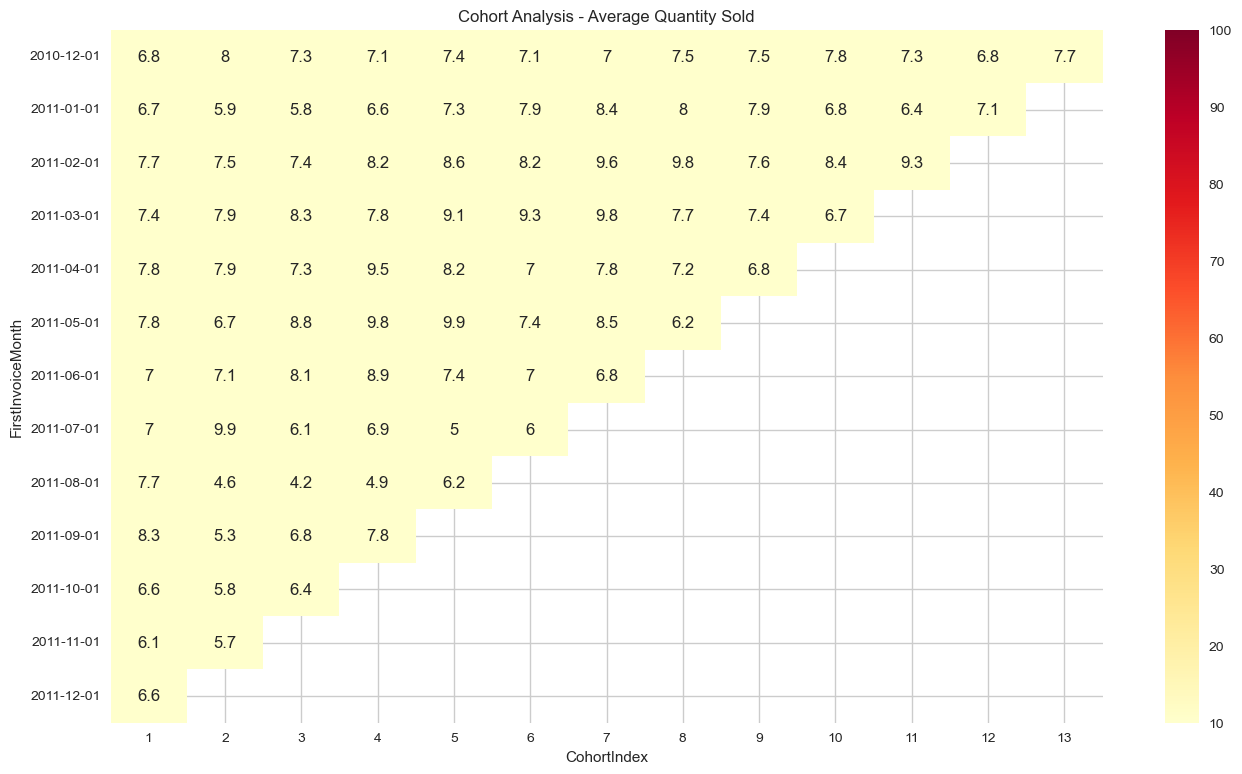

In [143]:
plt.figure(figsize=(16,9))
plt.title('Cohort Analysis - Average Quantity Sold')
sns.heatmap(data = pivot_avg_quantity, annot = True,cbar = True,fmt='0.3g',vmin = 10,vmax = 100,cmap = "YlOrRd");

In [144]:
cohort_avg_sales = cohort.groupby(["FirstInvoiceMonth","CohortIndex" ])["Total_Price"].mean().reset_index()
cohort_avg_sales.head()


FirstInvoiceMonth  CohortIndex  Total_Price
0        2010-12-01            1        15.02
1        2010-12-01            2        16.08
2        2010-12-01            3        15.20
3        2010-12-01            4        14.41
4        2010-12-01            5        14.31

In [146]:
pivot_avg_sales = pd.pivot_table(data=cohort_avg_sales, index="FirstInvoiceMonth",  columns="CohortIndex", values="Total_Price").round(1)
pivot_avg_sales

CohortIndex          1     2     3     4     5     6     7     8     9     10  \
FirstInvoiceMonth                                                               
2010-12-01        15.00 16.10 15.20 14.40 14.30 15.10 13.80 13.60 14.00 15.70   
2011-01-01        13.50 13.30 12.20 13.40 15.40 16.80 18.50 14.70 13.90 14.30   
2011-02-01        15.00 14.80 13.30 16.10 15.70 14.10 17.00 18.70 14.50 16.90   
2011-03-01        14.80 17.00 17.90 15.10 16.60 16.10 18.10 14.50 13.20 10.80   
2011-04-01        14.60 17.20 15.20 15.80 14.80 12.70 13.80 13.40 10.80   NaN   
2011-05-01        15.60 13.80 15.20 17.10 17.90 12.70 15.40 12.00   NaN   NaN   
2011-06-01        12.30  9.80 14.70 14.50 12.00 11.80 10.70   NaN   NaN   NaN   
2011-07-01        12.30 20.00 10.70 12.80  9.00  9.60   NaN   NaN   NaN   NaN   
2011-08-01        13.70 10.50 10.50 12.60 14.50   NaN   NaN   NaN   NaN   NaN   
2011-09-01        15.00 10.90 12.70 13.80   NaN   NaN   NaN   NaN   NaN   NaN   
2011-10-01        11.90 10.00 11.40   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-11-01        10.20  8.80   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2011-12-01         8.20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

CohortIndex          11    12    13  
FirstInvoiceMonth                    
2010-12-01        15.10 13.60 15.10  
2011-01-01        13.40 12.60   NaN  
2011-02-01        19.20   NaN   NaN  
2011-03-01          NaN   NaN   NaN  
2011-04-01          NaN   NaN   NaN  
2011-05-01          NaN   NaN   NaN  
2011-06-01          NaN   NaN   NaN  
2011-07-01          NaN   NaN   NaN  
2011-08-01          NaN   NaN   NaN  
2011-09-01          NaN   NaN   NaN  
2011-10-01          NaN   NaN   NaN  
2011-11-01          NaN   NaN   NaN  
2011-12-01          NaN   NaN   NaN

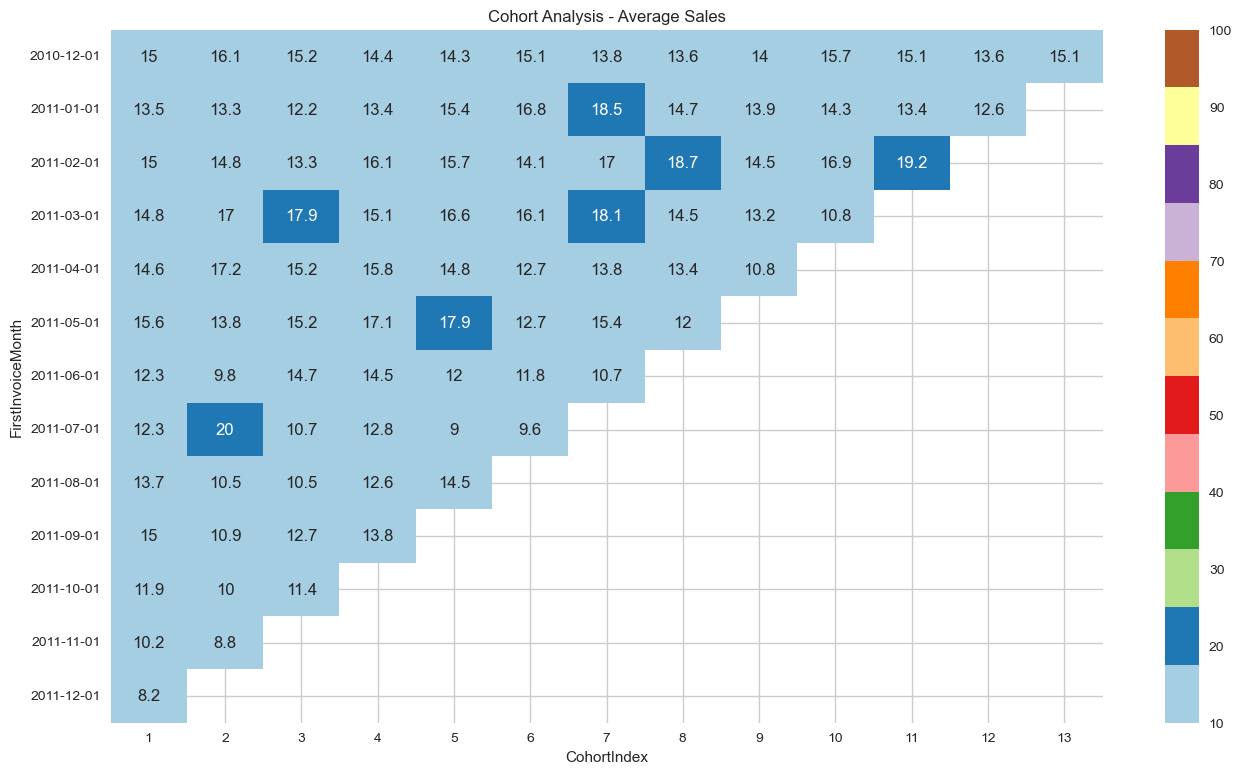

In [148]:
pivot_avg_sales.index = pivot_avg_sales.index.astype(str)
plt.figure(figsize=(16,9))
plt.title('Cohort Analysis - Average Sales')
sns.heatmap(data = pivot_avg_sales, annot = True,cbar = True,fmt='0.3g',vmin = 10,vmax = 100,cmap = "Paired");

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
<ul>
<li>  Sales have increased in all cohorts in May and September. What is the reason for this? Is it due to advertising campaigns, seasonality, or something else?
<li> Although cohort studies are difficult and take a lot of time to look at many indicators, the end result will be very helpful for understanding your clients, seasonality, and company changes.
</ul>
</div>